In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# - Inclure ici toutes les autres librairies dont vous aurez besoin
# - Écrivez en commentaire le rôle de chaque librairie
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# votre code ici:
import pandas as pd

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# ==========================================
# ===============VARIABLES==================
# ==========================================

# l'emplacement des données sur le disque
# Note: Il faut placer le dossier "donnees"  contenant les 8 fichiers .csv dans le même endroit que les fichiers de code
data_path = "donnees/"

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# - Inclure ici toutes les autres variables globales dont vous aurez besoin
# - Écrivez en commentaire le rôle de chaque variable
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# votre code ici:


# ==========================================
# ====CHARGEMENT DES DONNÉES EN MÉMOIRE=====
# ==========================================

# Lire les 8 tables csv et les remplir dans 8 objets de type Dataframe
# Ces 8 Dataframes doivent être utilisés pour calculer les features
!unzip donnees.zip
utilisateurs = pd.read_csv(data_path + "utilisateurs.csv", skipinitialspace=True)
avis = pd.read_csv(data_path + "avis.csv", skipinitialspace=True)
conseils = pd.read_csv(data_path + "conseils.csv", skipinitialspace=True)
checkin = pd.read_csv(data_path + "checkin.csv", skipinitialspace=True)
restaurants = pd.read_csv(data_path + "restaurants.csv", skipinitialspace=True)
horaires = pd.read_csv(data_path + "horaires.csv", skipinitialspace=True)
services = pd.read_csv(data_path + "services.csv", skipinitialspace=True)
categories = pd.read_csv(data_path + "categories.csv", skipinitialspace=True)

# Imprimer la taille de chaque table de données
print("Taille des données:")
print("------------------")
print("utilisateurs:\t", len(utilisateurs))
print("avis:\t\t\t", len(avis))
print("conseils:\t\t", len(conseils))
print("checkin:\t\t", len(checkin))
print("restaurants:\t", len(restaurants))
print("horaires:\t\t", len(horaires))
print("services:\t\t", len(services))
print("categories:\t\t", len(categories))
print("------------------")


Archive:  donnees.zip
  inflating: donnees/avis.csv        
  inflating: donnees/categories.csv  
  inflating: donnees/checkin.csv     
  inflating: donnees/conseils.csv    
  inflating: donnees/horaires.csv    
  inflating: donnees/restaurants.csv  
  inflating: donnees/services.csv    
  inflating: donnees/utilisateurs.csv  
Taille des données:
------------------
utilisateurs:	 748247
avis:			 2073685
conseils:		 416803
checkin:		 5492282
restaurants:	 34268
horaires:		 34268
services:		 34268
categories:		 89945
------------------


In [ ]:
#Prise d'un echantillion de taille 100 pour les restaurants, collecte d'information pour le reste des tableaux 

restaurants100=restaurants
avis100=avis
conseils100=conseils
checkin100=checkin
horaires100=horaires
services100=services
categories100=categories
utilisateurs100=utilisateurs


print(restaurants100)
print(avis100)
print(conseils100)
print(checkin100)
print(horaires100)
print(services100)
print(categories100)
print(utilisateurs100)

                restaurant_id                        nom  ...   zone ferme
0      lCwqJWMxvIUQt1Re_tDn4w                    Denny's  ...  89110     0
1      pd0v6sOqpLhFJ7mkpIaixw    Ike's Love & Sandwiches  ...  85004     0
2      0vhi__HtC2L4-vScgDFdFw       Midori Japanese Cafe  ...    T2T     0
3      t65yfB9v9fqlhAkLnnUXdg                      Pho U  ...    M5A     0
4      i7_JPit-2kAbtRTLkic2jA   John & Sons Oyster House  ...    M5H     0
...                       ...                        ...  ...    ...   ...
34263  cjZfgcQwA6KmQ_ANWKN2aw          Bruegger's Bagels  ...  15317     1
34264  Hq2edcOTjse7wjK2CwBijQ       Bistro Pointe-Claire  ...    H9S     1
34265  7KlpgRjjAmVabPzxcExs0g                   Taco Mex  ...  85051     1
34266  0fY-zYyP2fDmp2YXFsuNTg  Gotham Provisions Company  ...  53590     1
34267  cfrN6-lQC-dzjBtNBjefpQ    Rusty Nail Banquet Hall  ...  44240     1

[34268 rows x 6 columns]
                        avis_id  ...                 date
0        yi0R0Ug

In [ ]:
# ==========================================
# ==========CALCUL DES FEATURES=============
# ==========================================

# Initialisation du Dataframe "features" qui va contenir l'ensemble de données d'entrainement
# -----------------------------------------------------
# restaurant_id:  C'est l'identifiant (ID) du restaurant
# ferme: C'est la classe (Fermeture définitive : 1 , ouvert: 0)
# Les 3 premiers features sont déjà chargés: moyenne_etoiles, ville et zone
features = restaurants100[['restaurant_id', 'moyenne_etoiles', 'ville', 'zone', 'ferme']].copy()

In [ ]:

# Extraire l'année à partir des dates
# La colonne "annee" sera utilisée dans le calcul de certain features
# -----------------------------------------------------
checkin100["date"] = pd.to_datetime(checkin100["date"], format='%Y-%m-%d')
checkin100['annee'] = checkin100.date.dt.year

avis100["date"] = pd.to_datetime(avis100["date"], format='%Y-%m-%d')
avis100['annee'] = avis100.date.dt.year

conseils100["date"] = pd.to_datetime(conseils100["date"], format='%Y-%m-%d')
conseils100['annee'] = conseils100.date.dt.year


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      QUESTION 1
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Calculez chacun des 34 features suivants.
# Suivez la description de chaque feature afin de bien l'estimer
# Les features doivent être ajoutés au dataframe "features"
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# -----------------------------------------------------------
# 4) nb_restaurants_zone
# Le nombre de restaurants dans la zone associée au restaurant en question.
# -----------------------------------------------------------

# Votre code ici:
df=restaurants100.groupby('zone')['restaurant_id'].count().reset_index(name='nb_restaurants_zone')
features=pd.merge(features,df,how='left',on='zone')
features.head(10)


,restaurant_id,moyenne_etoiles,ville,zone,ferme,nb_restaurants_zone
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,0,49.0
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,0,172.0
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,0,77.0
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,0,121.0
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,0,96.0
5,vMh4madPU3qhNX7P7d8WGA,3.0,Phoenix,85085,0,27.0
6,BsvCTCVG7lrzXZ68VyyIcg,4.0,Cleveland,44113,0,165.0
7,es3Fq9KNp6Ry994x4T4ZYg,4.0,Phoenix,85007,0,44.0
8,Xb7jOAa17xtT_uA4sCCAsg,4.0,Sun City,85351,0,20.0
9,1vrrpIhpK628PUA0XWWd8g,3.0,Toronto,M9W,0,47.0


In [ ]:
# -----------------------------------------------------------
# 5) zone_categories_intersection
# Le nombre de restaurants dans la même zone qui partagent au moins une catégorie avec le restaurant en question.
# -----------------------------------------------------------

# Votre code ici:
base=restaurants100[['restaurant_id','zone']]
base=pd.merge(base,categories100,on='restaurant_id')

base2=base
base2.columns=['restaurant_id2','zone','categorie']

base=pd.merge(base,base2,on=['categorie','zone'])
base=base[['restaurant_id2_x','restaurant_id2_y']].drop_duplicates()

base=base.groupby('restaurant_id2_x').count().reset_index()

base.columns=['restaurant_id','zone_categories_intersection']
features=pd.merge(features,base,how='left',on='restaurant_id')
features.head(10)

,restaurant_id,moyenne_etoiles,ville,zone,ferme,nb_restaurants_zone,zone_categories_intersection
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,0,49.0,10.0
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,0,172.0,36.0
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,0,77.0,4.0
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,0,121.0,6.0
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,0,96.0,10.0
5,vMh4madPU3qhNX7P7d8WGA,3.0,Phoenix,85085,0,27.0,3.0
6,BsvCTCVG7lrzXZ68VyyIcg,4.0,Cleveland,44113,0,165.0,20.0
7,es3Fq9KNp6Ry994x4T4ZYg,4.0,Phoenix,85007,0,44.0,19.0
8,Xb7jOAa17xtT_uA4sCCAsg,4.0,Sun City,85351,0,20.0,3.0
9,1vrrpIhpK628PUA0XWWd8g,3.0,Toronto,M9W,0,47.0,5.0


In [ ]:
# -----------------------------------------------------------
# 6) ville_categories_intersection
# Le nombre de restaurants dans la même ville qui partagent au moins une catégorie avec le restaurant en question.
# -----------------------------------------------------------

# Votre code ici:
base=restaurants100[['restaurant_id','ville']]
base=pd.merge(base,categories100,on='restaurant_id')

base2=base
base2.columns=['restaurant_id2','ville','categorie']

base=pd.merge(base,base2,on=['categorie','ville'])
base=base[['restaurant_id2_x','restaurant_id2_y']].drop_duplicates()

base=base.groupby('restaurant_id2_x').count().reset_index()

base.columns=['restaurant_id','ville_categories_intersection']
features=pd.merge(features,base,how='left',on='restaurant_id')
features.head(10)


,restaurant_id,moyenne_etoiles,ville,zone,ferme,nb_restaurants_zone,zone_categories_intersection,ville_categories_intersection
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,0,49.0,10.0,709.0
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,0,172.0,36.0,414.0
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,0,77.0,4.0,95.0
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,0,121.0,6.0,503.0
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,0,96.0,10.0,160.0
5,vMh4madPU3qhNX7P7d8WGA,3.0,Phoenix,85085,0,27.0,3.0,252.0
6,BsvCTCVG7lrzXZ68VyyIcg,4.0,Cleveland,44113,0,165.0,20.0,96.0
7,es3Fq9KNp6Ry994x4T4ZYg,4.0,Phoenix,85007,0,44.0,19.0,723.0
8,Xb7jOAa17xtT_uA4sCCAsg,4.0,Sun City,85351,0,20.0,3.0,3.0
9,1vrrpIhpK628PUA0XWWd8g,3.0,Toronto,M9W,0,47.0,5.0,413.0


In [ ]:
# -----------------------------------------------------------
# 7) nb_restaurant_meme_annee
# Le nombre de restaurants qui sont ouverts leurs portes dans la même année que le restaurant en question.
# Ici, on considère que la première année d'un restaurant correspond à l'année de la première publication d'un avis sur ce restaurant sur Yelp.
# -----------------------------------------------------------

# Votre code ici:



restaurant_year=avis100[['restaurant_id','annee']]
restaurant_year=restaurant_year.groupby('restaurant_id', as_index=False).agg({"annee": min})
df=restaurant_year[['restaurant_id','annee']].groupby('annee')['restaurant_id'].count().reset_index(name='nb_restaurant_meme_annee')
restaurant_year=pd.merge(restaurant_year,df,on='annee')

features=pd.merge(features,restaurant_year[['restaurant_id','nb_restaurant_meme_annee']],how='left',on='restaurant_id')
features.head(10)


,restaurant_id,moyenne_etoiles,ville,zone,ferme,nb_restaurants_zone,zone_categories_intersection,ville_categories_intersection,nb_restaurant_meme_annee
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,0,49.0,10.0,709.0,3635
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,0,172.0,36.0,414.0,2392
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,0,77.0,4.0,95.0,3429
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,0,121.0,6.0,503.0,2993
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,0,96.0,10.0,160.0,2993
5,vMh4madPU3qhNX7P7d8WGA,3.0,Phoenix,85085,0,27.0,3.0,252.0,3429
6,BsvCTCVG7lrzXZ68VyyIcg,4.0,Cleveland,44113,0,165.0,20.0,96.0,2993
7,es3Fq9KNp6Ry994x4T4ZYg,4.0,Phoenix,85007,0,44.0,19.0,723.0,3025
8,Xb7jOAa17xtT_uA4sCCAsg,4.0,Sun City,85351,0,20.0,3.0,3.0,2993
9,1vrrpIhpK628PUA0XWWd8g,3.0,Toronto,M9W,0,47.0,5.0,413.0,1063


In [ ]:
# -----------------------------------------------------------
# 8) ecart_type_etoiles
# L'écart type de la moyenne des étoiles par année.
# Il faut estimer la moyenne des étoiles par années. Puis, calculer l'écart type sur ces valeurs.
# -----------------------------------------------------------

# Votre code ici:

Moyenne_des_avis=avis100[['restaurant_id','etoiles','annee']]
Moyenne_des_avis=Moyenne_des_avis.groupby(['restaurant_id','annee']).mean()

Restaurant_Moy_etoiles=Moyenne_des_avis.groupby(level=0).mean()
Restaurant_STD_etoiles=Moyenne_des_avis.groupby(level=0).std()

Restaurant_Moy_etoiles.columns =['moyenne_etoiles_par_annee']
Restaurant_STD_etoiles.columns =['ecart_type_etoiles']

features=pd.merge(features,Restaurant_Moy_etoiles,how='left',on='restaurant_id')
features=pd.merge(features,Restaurant_STD_etoiles,how='left',on='restaurant_id')
print(features)

                restaurant_id  ...  ecart_type_etoiles
0      lCwqJWMxvIUQt1Re_tDn4w  ...            0.771446
1      pd0v6sOqpLhFJ7mkpIaixw  ...            0.066894
2      0vhi__HtC2L4-vScgDFdFw  ...            0.578894
3      t65yfB9v9fqlhAkLnnUXdg  ...            0.593204
4      i7_JPit-2kAbtRTLkic2jA  ...            0.139991
...                       ...  ...                 ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...            1.505545
34264  Hq2edcOTjse7wjK2CwBijQ  ...            0.567238
34265  7KlpgRjjAmVabPzxcExs0g  ...            0.750925
34266  0fY-zYyP2fDmp2YXFsuNTg  ...            0.282843
34267  cfrN6-lQC-dzjBtNBjefpQ  ...            2.081666

[34268 rows x 11 columns]


In [ ]:
# -----------------------------------------------------------
# 9) tendance_etoiles
# La différence entre la moyenne des étoiles de la dernière année et la moyenne des étoiles de la première année d'un restaurant.
# Ici, on considère la première année d'un restaurant correspond à l'année de la première publication d'un avis sur ce restaurant sur Yelp.
# -----------------------------------------------------------

# Votre code ici:

Restaurant_min_etoiles=Moyenne_des_avis.groupby(level=0).first()
Restaurant_max_etoiles=Moyenne_des_avis.groupby(level=0).last()

Restaurant_min_etoiles.columns =['min_etoiles_par_annee']
Restaurant_max_etoiles.columns =['max_etoiles_par_annee']

Restaurant_tendance_etoiles=pd.merge(Restaurant_min_etoiles,Restaurant_max_etoiles,how='right',on='restaurant_id')
Restaurant_tendance_etoiles['tendance_etoiles']=Restaurant_tendance_etoiles['max_etoiles_par_annee']-Restaurant_tendance_etoiles['min_etoiles_par_annee']
Restaurant_tendance_etoiles=Restaurant_tendance_etoiles.reset_index()

features=pd.merge(features,Restaurant_tendance_etoiles[['restaurant_id','tendance_etoiles']],how='left',on='restaurant_id')

print(features)


                restaurant_id  ...  tendance_etoiles
0      lCwqJWMxvIUQt1Re_tDn4w  ...         -0.826087
1      pd0v6sOqpLhFJ7mkpIaixw  ...         -0.005174
2      0vhi__HtC2L4-vScgDFdFw  ...         -1.666667
3      t65yfB9v9fqlhAkLnnUXdg  ...          1.333333
4      i7_JPit-2kAbtRTLkic2jA  ...         -0.200000
...                       ...  ...               ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...          2.000000
34264  Hq2edcOTjse7wjK2CwBijQ  ...         -1.083333
34265  7KlpgRjjAmVabPzxcExs0g  ...          1.500000
34266  0fY-zYyP2fDmp2YXFsuNTg  ...         -0.400000
34267  cfrN6-lQC-dzjBtNBjefpQ  ...         -3.000000

[34268 rows x 12 columns]


In [ ]:
# -----------------------------------------------------------
# 10) nb_avis
# Le nombre total d'avis pour ce restaurant.
# -----------------------------------------------------------

# Votre code ici:

Nombre_des_avis=avis100[['restaurant_id','etoiles']].groupby('restaurant_id')['restaurant_id'].count().reset_index(name='nb_avis')
features=pd.merge(features,Nombre_des_avis,how='left',on='restaurant_id')

print(features)


                restaurant_id  moyenne_etoiles  ... tendance_etoiles nb_avis
0      lCwqJWMxvIUQt1Re_tDn4w              2.5  ...        -0.826087      72
1      pd0v6sOqpLhFJ7mkpIaixw              4.0  ...        -0.005174     108
2      0vhi__HtC2L4-vScgDFdFw              3.5  ...        -1.666667      49
3      t65yfB9v9fqlhAkLnnUXdg              3.5  ...         1.333333      36
4      i7_JPit-2kAbtRTLkic2jA              4.0  ...        -0.200000      88
...                       ...              ...  ...              ...     ...
34263  cjZfgcQwA6KmQ_ANWKN2aw              3.5  ...         2.000000       6
34264  Hq2edcOTjse7wjK2CwBijQ              3.5  ...        -1.083333      11
34265  7KlpgRjjAmVabPzxcExs0g              4.0  ...         1.500000      11
34266  0fY-zYyP2fDmp2YXFsuNTg              4.0  ...        -0.400000      18
34267  cfrN6-lQC-dzjBtNBjefpQ              2.5  ...        -3.000000       3

[34268 rows x 13 columns]


In [ ]:
# -----------------------------------------------------------
# 11) nb_avis_favorables
# Le nombre total d'avis favorables et positifs pour ce restaurant.
# On considère un avis "favorable" si son nombre d'étoiles est >=3.
# -----------------------------------------------------------

# Votre code ici:
Nombre_des_avis_positifs=avis100[avis100['etoiles']>=3][['restaurant_id','etoiles']]
Nombre_des_avis_positifs=Nombre_des_avis_positifs.groupby('restaurant_id')['restaurant_id'].count().reset_index(name='nb_avis_favorables')
features=pd.merge(features,Nombre_des_avis_positifs,how='left',on='restaurant_id')

print(features)

                restaurant_id  moyenne_etoiles  ... nb_avis nb_avis_favorables
0      lCwqJWMxvIUQt1Re_tDn4w              2.5  ...      72               29.0
1      pd0v6sOqpLhFJ7mkpIaixw              4.0  ...     108               92.0
2      0vhi__HtC2L4-vScgDFdFw              3.5  ...      49               44.0
3      t65yfB9v9fqlhAkLnnUXdg              3.5  ...      36               29.0
4      i7_JPit-2kAbtRTLkic2jA              4.0  ...      88               77.0
...                       ...              ...  ...     ...                ...
34263  cjZfgcQwA6KmQ_ANWKN2aw              3.5  ...       6                5.0
34264  Hq2edcOTjse7wjK2CwBijQ              3.5  ...      11                9.0
34265  7KlpgRjjAmVabPzxcExs0g              4.0  ...      11               10.0
34266  0fY-zYyP2fDmp2YXFsuNTg              4.0  ...      18               16.0
34267  cfrN6-lQC-dzjBtNBjefpQ              2.5  ...       3                1.0

[34268 rows x 14 columns]


In [ ]:
# -----------------------------------------------------------
# 12) nb_avis_defavorables
# Le nombre total d'avis défavorables pour ce restaurant.
# On considère un avis comme "défavorable" si son nombre d'étoiles est  < 3.
# -----------------------------------------------------------

# Votre code ici:
Nombre_des_avis_negatifs=avis100[avis100['etoiles']<3][['restaurant_id','etoiles']]
Nombre_des_avis_negatifs=Nombre_des_avis_negatifs.groupby('restaurant_id')['restaurant_id'].count().reset_index(name='nb_avis_defavorables')
features=pd.merge(features,Nombre_des_avis_negatifs,how='left',on='restaurant_id')

print(features)

                restaurant_id  ...  nb_avis_defavorables
0      lCwqJWMxvIUQt1Re_tDn4w  ...                  43.0
1      pd0v6sOqpLhFJ7mkpIaixw  ...                  16.0
2      0vhi__HtC2L4-vScgDFdFw  ...                   5.0
3      t65yfB9v9fqlhAkLnnUXdg  ...                   7.0
4      i7_JPit-2kAbtRTLkic2jA  ...                  11.0
...                       ...  ...                   ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...                   1.0
34264  Hq2edcOTjse7wjK2CwBijQ  ...                   2.0
34265  7KlpgRjjAmVabPzxcExs0g  ...                   1.0
34266  0fY-zYyP2fDmp2YXFsuNTg  ...                   2.0
34267  cfrN6-lQC-dzjBtNBjefpQ  ...                   2.0

[34268 rows x 15 columns]


In [ ]:
# -----------------------------------------------------------
# 13) ratio_avis_favorables
#  Le nombre d'avis favorables et positifs sur le nombre total d'avis pour ce restaurant.
# -----------------------------------------------------------

# Votre code ici:

features['ratio_avis_favorables']=features['nb_avis_favorables']/features['nb_avis']
print(features)


                restaurant_id  ...  ratio_avis_favorables
0      lCwqJWMxvIUQt1Re_tDn4w  ...               0.402778
1      pd0v6sOqpLhFJ7mkpIaixw  ...               0.851852
2      0vhi__HtC2L4-vScgDFdFw  ...               0.897959
3      t65yfB9v9fqlhAkLnnUXdg  ...               0.805556
4      i7_JPit-2kAbtRTLkic2jA  ...               0.875000
...                       ...  ...                    ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...               0.833333
34264  Hq2edcOTjse7wjK2CwBijQ  ...               0.818182
34265  7KlpgRjjAmVabPzxcExs0g  ...               0.909091
34266  0fY-zYyP2fDmp2YXFsuNTg  ...               0.888889
34267  cfrN6-lQC-dzjBtNBjefpQ  ...               0.333333

[34268 rows x 16 columns]


In [ ]:
# -----------------------------------------------------------
# 14) ratio_avis_defavorables
#  Le nombre d'avis défavorables sur le nombre total d'avis pour ce restaurant.
# -----------------------------------------------------------

# Votre code ici:
features['ratio_avis_defavorables']=features['nb_avis_defavorables']/features['nb_avis']
print(features)

                restaurant_id  ...  ratio_avis_defavorables
0      lCwqJWMxvIUQt1Re_tDn4w  ...                 0.597222
1      pd0v6sOqpLhFJ7mkpIaixw  ...                 0.148148
2      0vhi__HtC2L4-vScgDFdFw  ...                 0.102041
3      t65yfB9v9fqlhAkLnnUXdg  ...                 0.194444
4      i7_JPit-2kAbtRTLkic2jA  ...                 0.125000
...                       ...  ...                      ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...                 0.166667
34264  Hq2edcOTjse7wjK2CwBijQ  ...                 0.181818
34265  7KlpgRjjAmVabPzxcExs0g  ...                 0.090909
34266  0fY-zYyP2fDmp2YXFsuNTg  ...                 0.111111
34267  cfrN6-lQC-dzjBtNBjefpQ  ...                 0.666667

[34268 rows x 17 columns]


In [ ]:
# -----------------------------------------------------------
# 15) nb_avis_favorables_mention
# Le nombre total d'avis qui ont reçu au moins une mention "useful" ou "funny" ou "cool" ET le nombre d'étoiles de l'avis est >=3.
# -----------------------------------------------------------

# Votre code ici:
avis_mention=avis100[['utilisateur_id','restaurant_id','etoiles','useful','funny','cool']]
avis_mention['somme_mention']=avis_mention['useful']+avis_mention['funny']+avis_mention['cool']
df=avis_mention[(avis_mention['somme_mention']>0)&(avis_mention['etoiles']>=3)][['restaurant_id','etoiles']].groupby('restaurant_id' ).count().reset_index()
df.columns=['restaurant_id','nb_avis_favorables_mention']
features=pd.merge(features,df,how='left',on='restaurant_id')

print(features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


                restaurant_id  ...  nb_avis_favorables_mention
0      lCwqJWMxvIUQt1Re_tDn4w  ...                         8.0
1      pd0v6sOqpLhFJ7mkpIaixw  ...                        42.0
2      0vhi__HtC2L4-vScgDFdFw  ...                        24.0
3      t65yfB9v9fqlhAkLnnUXdg  ...                        26.0
4      i7_JPit-2kAbtRTLkic2jA  ...                        35.0
...                       ...  ...                         ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...                         1.0
34264  Hq2edcOTjse7wjK2CwBijQ  ...                         4.0
34265  7KlpgRjjAmVabPzxcExs0g  ...                         9.0
34266  0fY-zYyP2fDmp2YXFsuNTg  ...                        12.0
34267  cfrN6-lQC-dzjBtNBjefpQ  ...                         1.0

[34268 rows x 18 columns]


In [ ]:
# -----------------------------------------------------------
# 16) nb_avis_defavorables_mention
# Le nombre total d'avis qui ont reçu au moins une mention "useful" ou "funny" ou "cool" ET le nombre d'étoiles de l'avis est <3.
# -----------------------------------------------------------

# Votre code ici:
df=avis_mention[(avis_mention['somme_mention']>0)&(avis_mention['etoiles']<3)][['restaurant_id','etoiles']].groupby('restaurant_id' ).count().reset_index()
df.columns=['restaurant_id','nb_avis_defavorables_mention']
features=pd.merge(features,df,how='left',on='restaurant_id')

print(features)

                restaurant_id  ...  nb_avis_defavorables_mention
0      lCwqJWMxvIUQt1Re_tDn4w  ...                          17.0
1      pd0v6sOqpLhFJ7mkpIaixw  ...                           9.0
2      0vhi__HtC2L4-vScgDFdFw  ...                           3.0
3      t65yfB9v9fqlhAkLnnUXdg  ...                           4.0
4      i7_JPit-2kAbtRTLkic2jA  ...                           6.0
...                       ...  ...                           ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...                           NaN
34264  Hq2edcOTjse7wjK2CwBijQ  ...                           2.0
34265  7KlpgRjjAmVabPzxcExs0g  ...                           NaN
34266  0fY-zYyP2fDmp2YXFsuNTg  ...                           1.0
34267  cfrN6-lQC-dzjBtNBjefpQ  ...                           NaN

[34268 rows x 19 columns]


In [ ]:
# -----------------------------------------------------------
# 17) nb_avis_favorables_elites
# Le nombre total d'avis favorables pour un restaurant qui sont rédigés par des utilisateurs élites.
# Dans ce travail, on considère un utilisateur élite si son statut est "élite" (élite = 1 dans la table Utilisateurs)
# ET il a rédigé au moins 100 avis au total ET il a au moins 100 avis avec mention.
# -----------------------------------------------------------

# Votre code ici:
utilisateurs_elites=utilisateurs100[(utilisateurs100['elite']==1)&(utilisateurs100['nb_avis']>=100)&(utilisateurs100['nb_avis_mention']>=100)][['utilisateur_id']]
avis_elites=pd.merge(avis_mention,utilisateurs_elites,on='utilisateur_id')
df=avis_elites[avis_elites['etoiles']>=3][['restaurant_id','utilisateur_id']]
df=df.groupby('restaurant_id').count().reset_index()
df.columns=['restaurant_id','nb_avis_favorables_elites']
features=pd.merge(features,df,how='left',on='restaurant_id')

print(features)

                restaurant_id  ...  nb_avis_favorables_elites
0      lCwqJWMxvIUQt1Re_tDn4w  ...                        4.0
1      pd0v6sOqpLhFJ7mkpIaixw  ...                       14.0
2      0vhi__HtC2L4-vScgDFdFw  ...                       17.0
3      t65yfB9v9fqlhAkLnnUXdg  ...                        2.0
4      i7_JPit-2kAbtRTLkic2jA  ...                       26.0
...                       ...  ...                        ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...                        1.0
34264  Hq2edcOTjse7wjK2CwBijQ  ...                        NaN
34265  7KlpgRjjAmVabPzxcExs0g  ...                        1.0
34266  0fY-zYyP2fDmp2YXFsuNTg  ...                        1.0
34267  cfrN6-lQC-dzjBtNBjefpQ  ...                        NaN

[34268 rows x 20 columns]


In [ ]:
# -----------------------------------------------------------
# 18) nb_avis_defavorables_elites
# Le nombre total d'avis défavorables pour un restaurant qui sont rédigés par des utilisateurs élites.
# Dans ce travail, on considère un utilisateur élite si son statut est "élite" (élite = 1 dans la table Utilisateurs)
# ET il a rédigé au moins 100 avis au total ET il a au moins 100 avis avec mention.
# -----------------------------------------------------------

# Votre code ici:

df=avis_elites[avis_elites['etoiles']<3][['restaurant_id','utilisateur_id']]
df=df.groupby('restaurant_id').count().reset_index()
df.columns=['restaurant_id','nb_avis_defavorables_elites']
features=pd.merge(features,df,how='left',on='restaurant_id')

print(features)



                restaurant_id  ...  nb_avis_defavorables_elites
0      lCwqJWMxvIUQt1Re_tDn4w  ...                          1.0
1      pd0v6sOqpLhFJ7mkpIaixw  ...                          2.0
2      0vhi__HtC2L4-vScgDFdFw  ...                          NaN
3      t65yfB9v9fqlhAkLnnUXdg  ...                          NaN
4      i7_JPit-2kAbtRTLkic2jA  ...                          NaN
...                       ...  ...                          ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...                          NaN
34264  Hq2edcOTjse7wjK2CwBijQ  ...                          NaN
34265  7KlpgRjjAmVabPzxcExs0g  ...                          NaN
34266  0fY-zYyP2fDmp2YXFsuNTg  ...                          NaN
34267  cfrN6-lQC-dzjBtNBjefpQ  ...                          NaN

[34268 rows x 21 columns]


In [ ]:
# -----------------------------------------------------------
# 19) nb_conseils
#  Le nombre total de conseils (tips) associés à un restaurant.
# -----------------------------------------------------------

# Votre code ici:
restaurants_conseils=conseils100[['restaurant_id','nb_compliments']]
df=restaurants_conseils.groupby('restaurant_id').count().reset_index()
df.columns=['restaurant_id','nb_conseils']
features=pd.merge(features,df,how='left',on='restaurant_id')

print(features)


                restaurant_id  ...  nb_conseils
0      lCwqJWMxvIUQt1Re_tDn4w  ...         20.0
1      pd0v6sOqpLhFJ7mkpIaixw  ...         16.0
2      0vhi__HtC2L4-vScgDFdFw  ...          9.0
3      t65yfB9v9fqlhAkLnnUXdg  ...          3.0
4      i7_JPit-2kAbtRTLkic2jA  ...          5.0
...                       ...  ...          ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...          4.0
34264  Hq2edcOTjse7wjK2CwBijQ  ...          1.0
34265  7KlpgRjjAmVabPzxcExs0g  ...          9.0
34266  0fY-zYyP2fDmp2YXFsuNTg  ...          3.0
34267  cfrN6-lQC-dzjBtNBjefpQ  ...          NaN

[34268 rows x 22 columns]


In [ ]:
# -----------------------------------------------------------
# 20) nb_conseils_compliment
# Le nombre total de conseils qui ont reçu au moins un compliment (voir Table Conseils).
# -----------------------------------------------------------

# Votre code ici:
df=restaurants_conseils[restaurants_conseils['nb_compliments']>0]
df=df.groupby('restaurant_id').count().reset_index()
df.columns=['restaurant_id','nb_conseils_compliment']
features=pd.merge(features,df,how='left',on='restaurant_id')

print(features)

                restaurant_id  ...  nb_conseils_compliment
0      lCwqJWMxvIUQt1Re_tDn4w  ...                     NaN
1      pd0v6sOqpLhFJ7mkpIaixw  ...                     1.0
2      0vhi__HtC2L4-vScgDFdFw  ...                     NaN
3      t65yfB9v9fqlhAkLnnUXdg  ...                     NaN
4      i7_JPit-2kAbtRTLkic2jA  ...                     NaN
...                       ...  ...                     ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...                     NaN
34264  Hq2edcOTjse7wjK2CwBijQ  ...                     NaN
34265  7KlpgRjjAmVabPzxcExs0g  ...                     NaN
34266  0fY-zYyP2fDmp2YXFsuNTg  ...                     NaN
34267  cfrN6-lQC-dzjBtNBjefpQ  ...                     NaN

[34268 rows x 23 columns]


In [ ]:
# -----------------------------------------------------------
# 21) nb_conseils_elites
# Le nombre total de conseils sur un restaurant qui sont rédigés par des utilisateurs élites.
# Dans ce travail, on considère un utilisateur élite si son statut est "élite" (élite = 1 dans la table Utilisateurs)
# ET il a rédigé au moins 100 avis au total ET il a au moins 100 avis avec mention.
# -----------------------------------------------------------

# Votre code ici:

restaurants_conseils=conseils100[['utilisateur_id','restaurant_id','nb_compliments']]
restaurants_conseils_elites=pd.merge(restaurants_conseils,utilisateurs_elites,on='utilisateur_id')
df=restaurants_conseils_elites[['utilisateur_id','restaurant_id']].groupby('restaurant_id').count().reset_index()
df.columns=['restaurant_id','nb_conseils_elites']
features=pd.merge(features,df,how='left',on='restaurant_id')

print(features)

                restaurant_id  ...  nb_conseils_elites
0      lCwqJWMxvIUQt1Re_tDn4w  ...                 2.0
1      pd0v6sOqpLhFJ7mkpIaixw  ...                 2.0
2      0vhi__HtC2L4-vScgDFdFw  ...                 3.0
3      t65yfB9v9fqlhAkLnnUXdg  ...                 NaN
4      i7_JPit-2kAbtRTLkic2jA  ...                 2.0
...                       ...  ...                 ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...                 NaN
34264  Hq2edcOTjse7wjK2CwBijQ  ...                 NaN
34265  7KlpgRjjAmVabPzxcExs0g  ...                 NaN
34266  0fY-zYyP2fDmp2YXFsuNTg  ...                 NaN
34267  cfrN6-lQC-dzjBtNBjefpQ  ...                 NaN

[34268 rows x 24 columns]


In [ ]:
# -----------------------------------------------------------
# 22) nb_checkin
# Le nombre total de visites.
# -----------------------------------------------------------

# Votre code ici:
restaurant_checkin=checkin100
df=restaurant_checkin[['restaurant_id','date']].groupby('restaurant_id').count().reset_index()
df.columns=['restaurant_id','nb_checkin']
features=pd.merge(features,df,how='left',on='restaurant_id')

print(features)




                restaurant_id  moyenne_etoiles  ... nb_conseils_elites nb_checkin
0      lCwqJWMxvIUQt1Re_tDn4w              2.5  ...                2.0      181.0
1      pd0v6sOqpLhFJ7mkpIaixw              4.0  ...                2.0      492.0
2      0vhi__HtC2L4-vScgDFdFw              3.5  ...                3.0      157.0
3      t65yfB9v9fqlhAkLnnUXdg              3.5  ...                NaN       18.0
4      i7_JPit-2kAbtRTLkic2jA              4.0  ...                2.0      110.0
...                       ...              ...  ...                ...        ...
34263  cjZfgcQwA6KmQ_ANWKN2aw              3.5  ...                NaN       37.0
34264  Hq2edcOTjse7wjK2CwBijQ              3.5  ...                NaN        5.0
34265  7KlpgRjjAmVabPzxcExs0g              4.0  ...                NaN       32.0
34266  0fY-zYyP2fDmp2YXFsuNTg              4.0  ...                NaN        7.0
34267  cfrN6-lQC-dzjBtNBjefpQ              2.5  ...                NaN        7.0

[34268 rows x 2

In [ ]:
# -----------------------------------------------------------
# 23) moyenne_checkin
# La moyenne de visites par année.
# -----------------------------------------------------------

# Votre code ici:
restaurant_checkin=checkin100
df=restaurant_checkin.groupby(['restaurant_id','annee']).count()
df=df.groupby(level=0).mean().reset_index()
df.columns=['restaurant_id','moyenne_checkin']
features=pd.merge(features,df,how='left',on='restaurant_id')

print(features)


                restaurant_id  moyenne_etoiles  ... nb_checkin moyenne_checkin
0      lCwqJWMxvIUQt1Re_tDn4w              2.5  ...      181.0       20.111111
1      pd0v6sOqpLhFJ7mkpIaixw              4.0  ...      492.0      164.000000
2      0vhi__HtC2L4-vScgDFdFw              3.5  ...      157.0       17.444444
3      t65yfB9v9fqlhAkLnnUXdg              3.5  ...       18.0        3.600000
4      i7_JPit-2kAbtRTLkic2jA              4.0  ...      110.0       18.333333
...                       ...              ...  ...        ...             ...
34263  cjZfgcQwA6KmQ_ANWKN2aw              3.5  ...       37.0        4.625000
34264  Hq2edcOTjse7wjK2CwBijQ              3.5  ...        5.0        2.500000
34265  7KlpgRjjAmVabPzxcExs0g              4.0  ...       32.0        5.333333
34266  0fY-zYyP2fDmp2YXFsuNTg              4.0  ...        7.0        3.500000
34267  cfrN6-lQC-dzjBtNBjefpQ              2.5  ...        7.0        1.750000

[34268 rows x 26 columns]


In [ ]:
# -----------------------------------------------------------
# 24) ecart_type_checkin
# L'écart type de visites par année.
# Ici, on calcul l'écart type pour le total des visites par année.
# -----------------------------------------------------------

# Votre code ici:
df=restaurant_checkin.groupby(['restaurant_id','annee']).count()
df=df.groupby(level=0).std().reset_index()
df.columns=['restaurant_id','ecart_type_checkin']
features=pd.merge(features,df,how='left',on='restaurant_id')

print(features)

                restaurant_id  ...  ecart_type_checkin
0      lCwqJWMxvIUQt1Re_tDn4w  ...           10.635371
1      pd0v6sOqpLhFJ7mkpIaixw  ...           52.086467
2      0vhi__HtC2L4-vScgDFdFw  ...           15.828069
3      t65yfB9v9fqlhAkLnnUXdg  ...            1.816590
4      i7_JPit-2kAbtRTLkic2jA  ...            8.891944
...                       ...  ...                 ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...            5.553313
34264  Hq2edcOTjse7wjK2CwBijQ  ...            2.121320
34265  7KlpgRjjAmVabPzxcExs0g  ...            6.282250
34266  0fY-zYyP2fDmp2YXFsuNTg  ...            0.707107
34267  cfrN6-lQC-dzjBtNBjefpQ  ...            0.500000

[34268 rows x 27 columns]


In [ ]:
# -----------------------------------------------------------
# 25) chaine
#  Prend 0 ou 1. La valeur 1 indique que le restaurant fait parti d'une chaîne (p. ex. McDonald).
#  On considère un restaurant comme il fait partie d'une chaîne, s’il existe un autre restaurant dans la base de données qui a le même nom.
# -----------------------------------------------------------

# Votre code ici:
restaurant_name=restaurants100[['restaurant_id','nom']]
df=restaurant_name.groupby('nom').count().reset_index()
df.columns=['nom','nb_restaurant_meme_nom']
i=0
for nb in df['nb_restaurant_meme_nom']:
  if nb>1:
    df.loc[i,'chaine']=1
  else:
    df.loc[i,'chaine']=0
  i=i+1
restaurant_name=pd.merge(restaurant_name,df[['nom','chaine']],on='nom')
features=pd.merge(features,restaurant_name,how='left',on='restaurant_id')

print(features)


                restaurant_id  ...  chaine
0      lCwqJWMxvIUQt1Re_tDn4w  ...     1.0
1      pd0v6sOqpLhFJ7mkpIaixw  ...     1.0
2      0vhi__HtC2L4-vScgDFdFw  ...     0.0
3      t65yfB9v9fqlhAkLnnUXdg  ...     0.0
4      i7_JPit-2kAbtRTLkic2jA  ...     1.0
...                       ...  ...     ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...     1.0
34264  Hq2edcOTjse7wjK2CwBijQ  ...     0.0
34265  7KlpgRjjAmVabPzxcExs0g  ...     0.0
34266  0fY-zYyP2fDmp2YXFsuNTg  ...     0.0
34267  cfrN6-lQC-dzjBtNBjefpQ  ...     0.0

[34268 rows x 29 columns]


In [ ]:
# -----------------------------------------------------------
# 26) nb_heures_ouverture_semaine
# Le nombre total d'heures d'ouverture du restaurant par semaine.
# -----------------------------------------------------------

# Votre code ici:

def calcul_difference(entree):
  entree=str(entree)
  splt=entree.split('-')
  ouv=splt[0].split(':')
  ferm=splt[1].split(':')
  ouv_hour=int(ouv[0])
  ouv_min=int(ouv[1])
  ferm_hour=int(ferm[0])
  ferm_min=int(ferm[1])
  ecart_h=ferm_hour-ouv_hour
  ecart_m=ferm_min-ouv_min
  if ecart_m<0:
    ecart_m=ecart_m+60
    ecart_h=ecart_h-1
  if ecart_h<0:
    ecart_h=ecart_h+24
  ecart=ecart_h+(ecart_m/60)
  if ecart==0:
    ecart=24
  return(ecart)


horaires_ouv_ferm=horaires100


for id in range(horaires_ouv_ferm.shape[0]):
  horaires_ouv_ferm.loc[id,'nb_heures_ouverture_semaine']=0
  
  for j in range (1,8,1):
    
    if str(horaires_ouv_ferm.iloc[id,j])!='nan':
      ecart=calcul_difference(horaires_ouv_ferm.iloc[id,j])
    else:
      ecart=0
    horaires_ouv_ferm.loc[id,'nb_heures_ouverture_semaine']=horaires_ouv_ferm.loc[id,'nb_heures_ouverture_semaine']+ecart
 

features=pd.merge(features,horaires_ouv_ferm[['restaurant_id','nb_heures_ouverture_semaine']],how='left',on='restaurant_id')

print(features)



  




                restaurant_id  ...  nb_heures_ouverture_semaine
0      lCwqJWMxvIUQt1Re_tDn4w  ...                        168.0
1      pd0v6sOqpLhFJ7mkpIaixw  ...                         64.0
2      0vhi__HtC2L4-vScgDFdFw  ...                         67.5
3      t65yfB9v9fqlhAkLnnUXdg  ...                         57.0
4      i7_JPit-2kAbtRTLkic2jA  ...                         55.5
...                       ...  ...                          ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...                         56.0
34264  Hq2edcOTjse7wjK2CwBijQ  ...                         68.5
34265  7KlpgRjjAmVabPzxcExs0g  ...                          0.0
34266  0fY-zYyP2fDmp2YXFsuNTg  ...                         35.0
34267  cfrN6-lQC-dzjBtNBjefpQ  ...                          0.0

[34268 rows x 30 columns]


In [ ]:
# -----------------------------------------------------------
# 27) ouvert_samedi
# Si le restaurant est ouvert les samedis (valeur booléenne : 0 ou 1).
# -----------------------------------------------------------

# Votre code ici:
horaires_ouv_ferm['ouvert_samedi']=0
for i in range(horaires_ouv_ferm.shape[0]):
  if str(horaires_ouv_ferm.iloc[i,6])!='nan':
    horaires_ouv_ferm.loc[i,'ouvert_samedi']=1

features=pd.merge(features,horaires_ouv_ferm[['restaurant_id','ouvert_samedi']],how='left',on='restaurant_id')

print(features)




                restaurant_id  ...  ouvert_samedi
0      lCwqJWMxvIUQt1Re_tDn4w  ...              1
1      pd0v6sOqpLhFJ7mkpIaixw  ...              1
2      0vhi__HtC2L4-vScgDFdFw  ...              1
3      t65yfB9v9fqlhAkLnnUXdg  ...              0
4      i7_JPit-2kAbtRTLkic2jA  ...              0
...                       ...  ...            ...
34263  cjZfgcQwA6KmQ_ANWKN2aw  ...              1
34264  Hq2edcOTjse7wjK2CwBijQ  ...              1
34265  7KlpgRjjAmVabPzxcExs0g  ...              0
34266  0fY-zYyP2fDmp2YXFsuNTg  ...              1
34267  cfrN6-lQC-dzjBtNBjefpQ  ...              0

[34268 rows x 31 columns]


In [ ]:
# -----------------------------------------------------------
# 28) ouvert_dimanche
# Si le restaurant est ouvert les dimanches (valeur booléenne : 0 ou 1).
# -----------------------------------------------------------

# Votre code ici:
horaires_ouv_ferm['ouvert_dimanche']=0
for i in range(horaires_ouv_ferm.shape[0]):
  if str(horaires_ouv_ferm.iloc[i,7])!='nan':
    horaires_ouv_ferm.loc[i,'ouvert_dimanche']=1

features=pd.merge(features,horaires_ouv_ferm[['restaurant_id','ouvert_dimanche']],how='left',on='restaurant_id')

print(features)

                restaurant_id  moyenne_etoiles  ... ouvert_samedi ouvert_dimanche
0      lCwqJWMxvIUQt1Re_tDn4w              2.5  ...             1               1
1      pd0v6sOqpLhFJ7mkpIaixw              4.0  ...             1               1
2      0vhi__HtC2L4-vScgDFdFw              3.5  ...             1               1
3      t65yfB9v9fqlhAkLnnUXdg              3.5  ...             0               1
4      i7_JPit-2kAbtRTLkic2jA              4.0  ...             0               0
...                       ...              ...  ...           ...             ...
34263  cjZfgcQwA6KmQ_ANWKN2aw              3.5  ...             1               1
34264  Hq2edcOTjse7wjK2CwBijQ              3.5  ...             1               1
34265  7KlpgRjjAmVabPzxcExs0g              4.0  ...             0               0
34266  0fY-zYyP2fDmp2YXFsuNTg              4.0  ...             1               0
34267  cfrN6-lQC-dzjBtNBjefpQ              2.5  ...             0               0

[34268 rows x 3

In [ ]:
# -----------------------------------------------------------
# 29) ouvert_lundi
# Si le restaurant est ouvert les lundis (valeur booléenne : 0 ou 1).
# -----------------------------------------------------------

# Votre code ici:
horaires_ouv_ferm['ouvert_lundi']=0
for i in range(horaires_ouv_ferm.shape[0]):
  if str(horaires_ouv_ferm.iloc[i,1])!='nan':
    horaires_ouv_ferm.loc[i,'ouvert_lundi']=1

features=pd.merge(features,horaires_ouv_ferm[['restaurant_id','ouvert_lundi']],how='left',on='restaurant_id')

print(features)

                restaurant_id  moyenne_etoiles  ... ouvert_dimanche ouvert_lundi
0      lCwqJWMxvIUQt1Re_tDn4w              2.5  ...               1            1
1      pd0v6sOqpLhFJ7mkpIaixw              4.0  ...               1            1
2      0vhi__HtC2L4-vScgDFdFw              3.5  ...               1            1
3      t65yfB9v9fqlhAkLnnUXdg              3.5  ...               1            1
4      i7_JPit-2kAbtRTLkic2jA              4.0  ...               0            1
...                       ...              ...  ...             ...          ...
34263  cjZfgcQwA6KmQ_ANWKN2aw              3.5  ...               1            0
34264  Hq2edcOTjse7wjK2CwBijQ              3.5  ...               1            1
34265  7KlpgRjjAmVabPzxcExs0g              4.0  ...               0            0
34266  0fY-zYyP2fDmp2YXFsuNTg              4.0  ...               0            0
34267  cfrN6-lQC-dzjBtNBjefpQ              2.5  ...               0            0

[34268 rows x 33 columns]


In [ ]:
# -----------------------------------------------------------
# 30) ouvert_vendredi
# Si le restaurant est ouvert les vendredis (valeur booléenne : 0 ou 1).
# -----------------------------------------------------------

# Votre code ici:
horaires_ouv_ferm['ouvert_vendredi']=0
for i in range(horaires_ouv_ferm.shape[0]):
  if str(horaires_ouv_ferm.iloc[i,5])!='nan':
    horaires_ouv_ferm.loc[i,'ouvert_vendredi']=1

features=pd.merge(features,horaires_ouv_ferm[['restaurant_id','ouvert_vendredi']],how='left',on='restaurant_id')

print(features)

                restaurant_id  moyenne_etoiles  ... ouvert_lundi ouvert_vendredi
0      lCwqJWMxvIUQt1Re_tDn4w              2.5  ...            1               1
1      pd0v6sOqpLhFJ7mkpIaixw              4.0  ...            1               1
2      0vhi__HtC2L4-vScgDFdFw              3.5  ...            1               1
3      t65yfB9v9fqlhAkLnnUXdg              3.5  ...            1               1
4      i7_JPit-2kAbtRTLkic2jA              4.0  ...            1               1
...                       ...              ...  ...          ...             ...
34263  cjZfgcQwA6KmQ_ANWKN2aw              3.5  ...            0               1
34264  Hq2edcOTjse7wjK2CwBijQ              3.5  ...            1               1
34265  7KlpgRjjAmVabPzxcExs0g              4.0  ...            0               0
34266  0fY-zYyP2fDmp2YXFsuNTg              4.0  ...            0               1
34267  cfrN6-lQC-dzjBtNBjefpQ              2.5  ...            0               0

[34268 rows x 34 columns]


In [ ]:
# -----------------------------------------------------------
# 31) emporter
# Si le restaurant offre le service à emporter (valeur booléenne : 0 ou 1).

# 32) livraison
# Si le restaurant offre le service de livraison (valeur booléenne : 0 ou 1).

# 33) bon_pour_groupes
# Si le restaurant est approprié pour les groupes (valeur booléenne : 0 ou 1).

# 34) bon_pour_enfants
# Si le restaurant est approprié pour les enfants (valeur booléenne : 0 ou 1).

# 35) reservation
# Si on a besoin de faire une réservation au restaurant (valeur booléenne : 0 ou 1).

# 36) prix
# Le niveau de prix du restaurant. Il existe trois niveaux, 1 (abordable), 2 (moyen) et 3 (coûteux).

# 37) terrasse
# Si le restaurant a une terrasse (valeur booléenne : 0 ou 1).
# -----------------------------------------------------------

# Votre code ici:
features=pd.merge(features,services100,how='left',on='restaurant_id')

print(features)

# -----------------------------------------------------------
# Sauvegarder l'ensemble de données dans un fichier csv afin d'être utilisé dans l'étape suivante
features.to_csv("donnees/features.csv", index=False)


                restaurant_id  moyenne_etoiles  ... prix terrasse
0      lCwqJWMxvIUQt1Re_tDn4w              2.5  ...    2        0
1      pd0v6sOqpLhFJ7mkpIaixw              4.0  ...    2        1
2      0vhi__HtC2L4-vScgDFdFw              3.5  ...    2        1
3      t65yfB9v9fqlhAkLnnUXdg              3.5  ...    1        0
4      i7_JPit-2kAbtRTLkic2jA              4.0  ...    3        0
...                       ...              ...  ...  ...      ...
34263  cjZfgcQwA6KmQ_ANWKN2aw              3.5  ...    1        0
34264  Hq2edcOTjse7wjK2CwBijQ              3.5  ...    2        1
34265  7KlpgRjjAmVabPzxcExs0g              4.0  ...    1        0
34266  0fY-zYyP2fDmp2YXFsuNTg              4.0  ...    1        0
34267  cfrN6-lQC-dzjBtNBjefpQ              2.5  ...    2        0

[34268 rows x 41 columns]


In [ ]:

# ===========================================================================
# Le but de ce travail est de classifier les restaurants en 2 états (Fermeture définitive / Ouvert)
#
# Ce fichier consiste la deuxième étape du travail -> pré-traitement du dataset issu de la première tache.
# Dans ce fichier code vous devez  traiter l’ensemble de données préparées dans la  première étape afin de
# les rendre prêtes pour la consommation par les modèles d’apprentissage dans l'étape suivante.
# ===========================================================================

# ==========================================
# ======CHARGEMENT DES LIBRAIRIES===========
# ==========================================

# la librairie principale pour la gestion des données
import pandas as pd

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# - Inclure ici toutes les autres librairies dont vous aurez besoin
# - Écrivez en commentaire le rôle de chaque librairie
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# votre code ici:

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# ==========================================
# ===============VARIABLES==================
# ==========================================

# l'emplacement des données sur le disque
# Note: Il faut placer le dossier "donnees"  contenant les 8 fichiers .csv dans le même endroit que les fichiers de code
data_path = "donnees/"

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# - Inclure ici toutes les autres variables globales dont vous aurez besoin
# - Écrivez en commentaire le rôle de chaque xvariable
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# votre code ici:

# ==========================================
# ====CHARGEMENT DES DONNÉES EN MÉMOIRE=====
# ==========================================

# charger en mémoire les features préparées dans la première étape
features = pd.read_csv(data_path + "features.csv")


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      QUESTION 1
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# - Remplacez les valeurs manquantes par de propres valeurs
#
# Vous devez identifier tous les features qui manquent de valeurs ou
# qui ont des valeurs erronées dans le fichier "features.csv" préparé dans la première etape,
# puis vous devez remplacez ces valeurs manquantes ou erronées par de propres valeurs.
# Les valeurs manquantes peuvent être remplacées par des 0, ou remplacées par la moyenne ou le mode.
# La méthode choisie doit dépendre de la nature de chaque feature.
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
features.head()

,restaurant_id,moyenne_etoiles,ville,zone,ferme,nb_restaurants_zone,zone_categories_intersection,ville_categories_intersection,nb_restaurant_meme_annee,moyenne_etoiles_par_annee,ecart_type_etoiles,tendance_etoiles,nb_avis,nb_avis_favorables,nb_avis_defavorables,ratio_avis_favorables,ratio_avis_defavorables,nb_avis_favorables_mention,nb_avis_defavorables_mention,nb_avis_favorables_elites,nb_avis_defavorables_elites,nb_conseils,nb_conseils_compliment,nb_conseils_elites,nb_checkin,moyenne_checkin,ecart_type_checkin,nom,chaine,nb_heures_ouverture_semaine,ouvert_samedi,ouvert_dimanche,ouvert_lundi,ouvert_vendredi,emporter,livraison,bon_pour_groupes,bon_pour_enfants,reservation,prix,terrasse
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,0,49.0,10.0,709.0,3635,2.705668,0.771446,-0.826087,72,29.0,43.0,0.402778,0.597222,8.0,17.0,4.0,1.0,20.0,NaN,2.0,181.0,20.111111,10.635371,Denny's,1.0,168.0,1,1,1,1,1,0,1,1,0,2,0
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,0,172.0,36.0,414.0,2392,4.187521,0.066894,-0.005174,108,92.0,16.0,0.851852,0.148148,42.0,9.0,14.0,2.0,16.0,1.0,2.0,492.0,164.000000,52.086467,Ike's Love & Sandwiches,1.0,64.0,1,1,1,1,1,1,1,1,0,2,1
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,0,77.0,4.0,95.0,3429,3.861648,0.578894,-1.666667,49,44.0,5.0,0.897959,0.102041,24.0,3.0,17.0,NaN,9.0,NaN,3.0,157.0,17.444444,15.828069,Midori Japanese Cafe,0.0,67.5,1,1,1,1,1,0,0,1,1,2,1
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,0,121.0,6.0,503.0,2993,3.541880,0.593204,1.333333,36,29.0,7.0,0.805556,0.194444,26.0,4.0,2.0,NaN,3.0,NaN,NaN,18.0,3.600000,1.816590,Pho U,0.0,57.0,0,1,1,1,1,1,0,1,1,1,0
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,0,96.0,10.0,160.0,2993,3.881315,0.139991,-0.200000,88,77.0,11.0,0.875000,0.125000,35.0,6.0,26.0,NaN,5.0,NaN,2.0,110.0,18.333333,8.891944,John & Sons Oyster House,1.0,55.5,0,0,1,1,1,0,1,0,1,3,0


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Zone
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:


base=features[['ville','zone']].value_counts().reset_index(name='counts') #search for zones with highest occurence

mode_zone=[] #create a new table with mode value for each region
mode_zone=pd.DataFrame(columns=['ville','mode_zone'])

for v in base['ville']:
  df=base[base['ville']==v]
  z=df.iloc[0,1]
  
  mode_zone=mode_zone.append({'ville':v,'mode_zone':z},ignore_index=True)
mode_zone=mode_zone.drop_duplicates()



features=pd.merge(features,mode_zone,how='left',on='ville')  #add new column for mode_zone

for i, (v,z,m) in enumerate(zip(features['ville'],features['zone'],features['mode_zone'])):#update zone value
  if str(z) =='nan':
    if str(m)=='nan':
      features.loc[i,'zone']=v
    else:
      features.loc[i,'zone']=m


del features['mode_zone'] #remove the new column for mode_zone
features.head(10)


,restaurant_id,moyenne_etoiles,ville,zone,ferme,nb_restaurants_zone,zone_categories_intersection,ville_categories_intersection,nb_restaurant_meme_annee,moyenne_etoiles_par_annee,ecart_type_etoiles,tendance_etoiles,nb_avis,nb_avis_favorables,nb_avis_defavorables,ratio_avis_favorables,ratio_avis_defavorables,nb_avis_favorables_mention,nb_avis_defavorables_mention,nb_avis_favorables_elites,nb_avis_defavorables_elites,nb_conseils,nb_conseils_compliment,nb_conseils_elites,nb_checkin,moyenne_checkin,ecart_type_checkin,nom,chaine,nb_heures_ouverture_semaine,ouvert_samedi,ouvert_dimanche,ouvert_lundi,ouvert_vendredi,emporter,livraison,bon_pour_groupes,bon_pour_enfants,reservation,prix,terrasse
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,0,49.0,10.0,709.0,3635,2.705668,0.771446,-0.826087,72,29.0,43.0,0.402778,0.597222,8.0,17.0,4.0,1.0,20.0,NaN,2.0,181.0,20.111111,10.635371,Denny's,1.0,168.0,1,1,1,1,1,0,1,1,0,2,0
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,0,172.0,36.0,414.0,2392,4.187521,0.066894,-0.005174,108,92.0,16.0,0.851852,0.148148,42.0,9.0,14.0,2.0,16.0,1.0,2.0,492.0,164.000000,52.086467,Ike's Love & Sandwiches,1.0,64.0,1,1,1,1,1,1,1,1,0,2,1
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,0,77.0,4.0,95.0,3429,3.861648,0.578894,-1.666667,49,44.0,5.0,0.897959,0.102041,24.0,3.0,17.0,NaN,9.0,NaN,3.0,157.0,17.444444,15.828069,Midori Japanese Cafe,0.0,67.5,1,1,1,1,1,0,0,1,1,2,1
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,0,121.0,6.0,503.0,2993,3.541880,0.593204,1.333333,36,29.0,7.0,0.805556,0.194444,26.0,4.0,2.0,NaN,3.0,NaN,NaN,18.0,3.600000,1.816590,Pho U,0.0,57.0,0,1,1,1,1,1,0,1,1,1,0
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,0,96.0,10.0,160.0,2993,3.881315,0.139991,-0.200000,88,77.0,11.0,0.875000,0.125000,35.0,6.0,26.0,NaN,5.0,NaN,2.0,110.0,18.333333,8.891944,John & Sons Oyster House,1.0,55.5,0,0,1,1,1,0,1,0,1,3,0
5,vMh4madPU3qhNX7P7d8WGA,3.0,Phoenix,85085,0,27.0,3.0,252.0,3429,3.000000,1.333333,0.500000,16,10.0,6.0,0.625000,0.375000,4.0,5.0,2.0,1.0,1.0,NaN,NaN,16.0,1.777778,0.833333,Ray's Pizza II,0.0,0.0,0,0,0,0,1,0,1,1,0,2,1
6,BsvCTCVG7lrzXZ68VyyIcg,4.0,Cleveland,44113,0,165.0,20.0,96.0,2993,3.840092,0.239916,0.561290,175,143.0,32.0,0.817143,0.182857,62.0,19.0,28.0,5.0,18.0,NaN,1.0,328.0,54.666667,15.487629,Lago,1.0,117.0,1,1,1,1,1,0,1,0,1,2,1
7,es3Fq9KNp6Ry994x4T4ZYg,4.0,Phoenix,85007,0,44.0,19.0,723.0,3025,3.863312,0.473195,-0.500000,79,69.0,10.0,0.873418,0.126582,38.0,9.0,11.0,1.0,20.0,NaN,2.0,187.0,20.777778,7.496295,AZTECA Bakeries & Restaurant,0.0,54.5,1,0,1,1,1,0,1,1,0,1,1
8,Xb7jOAa17xtT_uA4sCCAsg,4.0,Sun City,85351,0,20.0,3.0,3.0,2993,4.166667,0.983192,-2.000000,11,9.0,2.0,0.818182,0.181818,5.0,NaN,NaN,NaN,2.0,NaN,NaN,7.0,1.750000,0.957427,Memo's Bistro,0.0,0.0,0,0,0,0,1,0,1,1,1,2,0
9,1vrrpIhpK628PUA0XWWd8g,3.0,Toronto,M9W,0,47.0,5.0,413.0,1063,2.875000,NaN,0.000000,8,5.0,3.0,0.625000,0.375000,3.0,2.0,1.0,NaN,1.0,NaN,NaN,5.0,5.000000,NaN,Starving Artist,1.0,63.0,1,1,1,1,1,0,0,0,0,0,0


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      nb_restaurants_zone
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:



df=features[['restaurant_id','zone']].groupby('zone')['restaurant_id'].count().reset_index(name='nb_restaurants_zone')

col=features.columns

del features['nb_restaurants_zone'] #delete old column


features=pd.merge(features,df,how='left',on='zone') #reinsert new column


features=features[col] #readjust columns order

features.head()



,restaurant_id,moyenne_etoiles,ville,zone,ferme,nb_restaurants_zone,zone_categories_intersection,ville_categories_intersection,nb_restaurant_meme_annee,moyenne_etoiles_par_annee,ecart_type_etoiles,tendance_etoiles,nb_avis,nb_avis_favorables,nb_avis_defavorables,ratio_avis_favorables,ratio_avis_defavorables,nb_avis_favorables_mention,nb_avis_defavorables_mention,nb_avis_favorables_elites,nb_avis_defavorables_elites,nb_conseils,nb_conseils_compliment,nb_conseils_elites,nb_checkin,moyenne_checkin,ecart_type_checkin,nom,chaine,nb_heures_ouverture_semaine,ouvert_samedi,ouvert_dimanche,ouvert_lundi,ouvert_vendredi,emporter,livraison,bon_pour_groupes,bon_pour_enfants,reservation,prix,terrasse
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,0,49,10.0,709.0,3635,2.705668,0.771446,-0.826087,72,29.0,43.0,0.402778,0.597222,8.0,17.0,4.0,1.0,20.0,NaN,2.0,181.0,20.111111,10.635371,Denny's,1.0,168.0,1,1,1,1,1,0,1,1,0,2,0
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,0,172,36.0,414.0,2392,4.187521,0.066894,-0.005174,108,92.0,16.0,0.851852,0.148148,42.0,9.0,14.0,2.0,16.0,1.0,2.0,492.0,164.000000,52.086467,Ike's Love & Sandwiches,1.0,64.0,1,1,1,1,1,1,1,1,0,2,1
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,0,77,4.0,95.0,3429,3.861648,0.578894,-1.666667,49,44.0,5.0,0.897959,0.102041,24.0,3.0,17.0,NaN,9.0,NaN,3.0,157.0,17.444444,15.828069,Midori Japanese Cafe,0.0,67.5,1,1,1,1,1,0,0,1,1,2,1
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,0,121,6.0,503.0,2993,3.541880,0.593204,1.333333,36,29.0,7.0,0.805556,0.194444,26.0,4.0,2.0,NaN,3.0,NaN,NaN,18.0,3.600000,1.816590,Pho U,0.0,57.0,0,1,1,1,1,1,0,1,1,1,0
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,0,96,10.0,160.0,2993,3.881315,0.139991,-0.200000,88,77.0,11.0,0.875000,0.125000,35.0,6.0,26.0,NaN,5.0,NaN,2.0,110.0,18.333333,8.891944,John & Sons Oyster House,1.0,55.5,0,0,1,1,1,0,1,0,1,3,0


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      zone_categories_intersection
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:


categories = pd.read_csv(data_path + "categories.csv", skipinitialspace=True)

base=features[['restaurant_id','zone']]

base=pd.merge(base,categories,on='restaurant_id')

base2=base
base2.columns=['restaurant_id2','zone','categorie']

base=pd.merge(base,base2,on=['categorie','zone'])
base=base[['restaurant_id2_x','restaurant_id2_y']].drop_duplicates()

base=base.groupby('restaurant_id2_x').count().reset_index()

base.columns=['restaurant_id','zone_categories_intersection']

col=features.columns

del features['zone_categories_intersection'] #delete old column


features=pd.merge(features,base,how='left',on='restaurant_id') #reinsert new column


features=features[col] #readjust columns order
features['zone_categories_intersection'].fillna(0,inplace=True)
features.head(10)

,restaurant_id,moyenne_etoiles,ville,zone,ferme,nb_restaurants_zone,zone_categories_intersection,ville_categories_intersection,nb_restaurant_meme_annee,moyenne_etoiles_par_annee,ecart_type_etoiles,tendance_etoiles,nb_avis,nb_avis_favorables,nb_avis_defavorables,ratio_avis_favorables,ratio_avis_defavorables,nb_avis_favorables_mention,nb_avis_defavorables_mention,nb_avis_favorables_elites,nb_avis_defavorables_elites,nb_conseils,nb_conseils_compliment,nb_conseils_elites,nb_checkin,moyenne_checkin,ecart_type_checkin,nom,chaine,nb_heures_ouverture_semaine,ouvert_samedi,ouvert_dimanche,ouvert_lundi,ouvert_vendredi,emporter,livraison,bon_pour_groupes,bon_pour_enfants,reservation,prix,terrasse
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,0,49,10.0,709.0,3635,2.705668,0.771446,-0.826087,72,29.0,43.0,0.402778,0.597222,8.0,17.0,4.0,1.0,20.0,NaN,2.0,181.0,20.111111,10.635371,Denny's,1.0,168.0,1,1,1,1,1,0,1,1,0,2,0
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,0,172,36.0,414.0,2392,4.187521,0.066894,-0.005174,108,92.0,16.0,0.851852,0.148148,42.0,9.0,14.0,2.0,16.0,1.0,2.0,492.0,164.000000,52.086467,Ike's Love & Sandwiches,1.0,64.0,1,1,1,1,1,1,1,1,0,2,1
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,0,77,4.0,95.0,3429,3.861648,0.578894,-1.666667,49,44.0,5.0,0.897959,0.102041,24.0,3.0,17.0,NaN,9.0,NaN,3.0,157.0,17.444444,15.828069,Midori Japanese Cafe,0.0,67.5,1,1,1,1,1,0,0,1,1,2,1
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,0,121,6.0,503.0,2993,3.541880,0.593204,1.333333,36,29.0,7.0,0.805556,0.194444,26.0,4.0,2.0,NaN,3.0,NaN,NaN,18.0,3.600000,1.816590,Pho U,0.0,57.0,0,1,1,1,1,1,0,1,1,1,0
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,0,96,10.0,160.0,2993,3.881315,0.139991,-0.200000,88,77.0,11.0,0.875000,0.125000,35.0,6.0,26.0,NaN,5.0,NaN,2.0,110.0,18.333333,8.891944,John & Sons Oyster House,1.0,55.5,0,0,1,1,1,0,1,0,1,3,0
5,vMh4madPU3qhNX7P7d8WGA,3.0,Phoenix,85085,0,27,3.0,252.0,3429,3.000000,1.333333,0.500000,16,10.0,6.0,0.625000,0.375000,4.0,5.0,2.0,1.0,1.0,NaN,NaN,16.0,1.777778,0.833333,Ray's Pizza II,0.0,0.0,0,0,0,0,1,0,1,1,0,2,1
6,BsvCTCVG7lrzXZ68VyyIcg,4.0,Cleveland,44113,0,168,20.0,96.0,2993,3.840092,0.239916,0.561290,175,143.0,32.0,0.817143,0.182857,62.0,19.0,28.0,5.0,18.0,NaN,1.0,328.0,54.666667,15.487629,Lago,1.0,117.0,1,1,1,1,1,0,1,0,1,2,1
7,es3Fq9KNp6Ry994x4T4ZYg,4.0,Phoenix,85007,0,44,19.0,723.0,3025,3.863312,0.473195,-0.500000,79,69.0,10.0,0.873418,0.126582,38.0,9.0,11.0,1.0,20.0,NaN,2.0,187.0,20.777778,7.496295,AZTECA Bakeries & Restaurant,0.0,54.5,1,0,1,1,1,0,1,1,0,1,1
8,Xb7jOAa17xtT_uA4sCCAsg,4.0,Sun City,85351,0,20,3.0,3.0,2993,4.166667,0.983192,-2.000000,11,9.0,2.0,0.818182,0.181818,5.0,NaN,NaN,NaN,2.0,NaN,NaN,7.0,1.750000,0.957427,Memo's Bistro,0.0,0.0,0,0,0,0,1,0,1,1,1,2,0
9,1vrrpIhpK628PUA0XWWd8g,3.0,Toronto,M9W,0,47,5.0,413.0,1063,2.875000,NaN,0.000000,8,5.0,3.0,0.625000,0.375000,3.0,2.0,1.0,NaN,1.0,NaN,NaN,5.0,5.000000,NaN,Starving Artist,1.0,63.0,1,1,1,1,1,0,0,0,0,0,0


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      ville_categories_intersection
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:

features['ville_categories_intersection'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      ecart_type_etoiles
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features['ecart_type_etoiles'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      nb_avis_favorables
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features['nb_avis_favorables'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      nb_avis_defavorables
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features['nb_avis_defavorables'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      ratio_avis_favorables
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features['ratio_avis_favorables'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      ratio_avis_defavorables
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features['ratio_avis_defavorables'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      nb_avis_favorables_mention
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features['nb_avis_favorables_mention'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      nb_avis_defavorables_mention
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features['nb_avis_defavorables_mention'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      nb_avis_favorables_elites
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features['nb_avis_favorables_elites'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      nb_avis_defavorables_elites
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features['nb_avis_defavorables_elites'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      nb_conseils
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features['nb_conseils'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      nb_conseils_compliment
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features['nb_conseils_compliment'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      nb_conseils_elites
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features['nb_conseils_elites'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      nb_checkin
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features['nb_checkin'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      moyenne_checkin
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features['moyenne_checkin'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      ecart_type_checkin
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features['ecart_type_checkin'].fillna(0,inplace=True)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      nb_heures_ouverture_semaine
#                      ouvert_samedi
#                      ouvert_dimanche
#                      ouvert_lundi
#                      ouvert_vendredi
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
df=features[['restaurant_id','ville','zone','ferme','nb_heures_ouverture_semaine','ouvert_samedi','ouvert_dimanche','ouvert_lundi','ouvert_vendredi']]


restaurants_avec_horaires=df[(df['nb_heures_ouverture_semaine']!=0)&(df['ferme']==0)]
horaire_moyen=round(restaurants_avec_horaires.mean())

horaire_standard_zone=restaurants_avec_horaires.groupby('zone').mean('nb_heures_ouverture_semaine')
del horaire_standard_zone['ferme']
horaire_standard_zone['nb_heures_ouverture_semaine']=round(horaire_standard_zone['nb_heures_ouverture_semaine'],0)
horaire_standard_zone['ouvert_samedi']=round(horaire_standard_zone['ouvert_samedi'],0)
horaire_standard_zone['ouvert_dimanche']=round(horaire_standard_zone['ouvert_dimanche'],0)
horaire_standard_zone['ouvert_lundi']=round(horaire_standard_zone['ouvert_lundi'],0)
horaire_standard_zone['ouvert_vendredi']=round(horaire_standard_zone['ouvert_vendredi'],0)


horaire_standard_ville=restaurants_avec_horaires.groupby('ville').mean('nb_heures_ouverture_semaine')
del horaire_standard_ville['ferme']
horaire_standard_ville['nb_heures_ouverture_semaine']=round(horaire_standard_ville['nb_heures_ouverture_semaine'],0)
horaire_standard_ville['ouvert_samedi']=round(horaire_standard_ville['ouvert_samedi'],0)
horaire_standard_ville['ouvert_dimanche']=round(horaire_standard_ville['ouvert_dimanche'],0)
horaire_standard_ville['ouvert_lundi']=round(horaire_standard_ville['ouvert_lundi'],0)
horaire_standard_ville['ouvert_vendredi']=round(horaire_standard_ville['ouvert_vendredi'],0)

print(features[ features['nb_heures_ouverture_semaine']==0].shape)

zone_list=horaire_standard_zone.reset_index()['zone'].to_list()
ville_list=horaire_standard_ville.reset_index()['ville'].to_list()


for i, (f,ville,zone) in enumerate(zip(features['ferme'],features['ville'],features['zone'])):
  if zone in zone_list:
    features.loc[i,'nb_heures_ouverture_semaine']=horaire_standard_zone.loc[zone,'nb_heures_ouverture_semaine']
    features.loc[i,'ouvert_samedi']=horaire_standard_zone.loc[zone,'ouvert_samedi']
    features.loc[i,'ouvert_dimanche']=horaire_standard_zone.loc[zone,'ouvert_dimanche']
    features.loc[i,'ouvert_lundi']=horaire_standard_zone.loc[zone,'ouvert_lundi']
    features.loc[i,'ouvert_vendredi']=horaire_standard_zone.loc[zone,'ouvert_vendredi']
  elif ville in ville_list:
    features.loc[i,'nb_heures_ouverture_semaine']=horaire_standard_ville.loc[ville,'nb_heures_ouverture_semaine']
    features.loc[i,'ouvert_samedi']=horaire_standard_ville.loc[ville,'ouvert_samedi']
    features.loc[i,'ouvert_dimanche']=horaire_standard_ville.loc[ville,'ouvert_dimanche']
    features.loc[i,'ouvert_lundi']=horaire_standard_ville.loc[ville,'ouvert_lundi']
    features.loc[i,'ouvert_vendredi']=horaire_standard_ville.loc[ville,'ouvert_vendredi']
  else:
    features.loc[i,'nb_heures_ouverture_semaine']=horaire_moyen[1]
    features.loc[i,'ouvert_samedi']=horaire_moyen[2]
    features.loc[i,'ouvert_dimanche']=horaire_moyen[3]
    features.loc[i,'ouvert_lundi']=horaire_moyen[4]
    features.loc[i,'ouvert_vendredi']=horaire_moyen[5]    

print(features[features['nb_heures_ouverture_semaine']==0].shape)




features.head(10)

(9420, 41)
(0, 41)


,restaurant_id,moyenne_etoiles,ville,zone,ferme,nb_restaurants_zone,zone_categories_intersection,ville_categories_intersection,nb_restaurant_meme_annee,moyenne_etoiles_par_annee,ecart_type_etoiles,tendance_etoiles,nb_avis,nb_avis_favorables,nb_avis_defavorables,ratio_avis_favorables,ratio_avis_defavorables,nb_avis_favorables_mention,nb_avis_defavorables_mention,nb_avis_favorables_elites,nb_avis_defavorables_elites,nb_conseils,nb_conseils_compliment,nb_conseils_elites,nb_checkin,moyenne_checkin,ecart_type_checkin,nom,chaine,nb_heures_ouverture_semaine,ouvert_samedi,ouvert_dimanche,ouvert_lundi,ouvert_vendredi,emporter,livraison,bon_pour_groupes,bon_pour_enfants,reservation,prix,terrasse
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,0,49,10.0,709.0,3635,2.705668,0.771446,-0.826087,72,29.0,43.0,0.402778,0.597222,8.0,17.0,4.0,1.0,20.0,0.0,2.0,181.0,20.111111,10.635371,Denny's,1.0,98.0,1.0,1.0,1.0,1.0,1,0,1,1,0,2,0
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,0,172,36.0,414.0,2392,4.187521,0.066894,-0.005174,108,92.0,16.0,0.851852,0.148148,42.0,9.0,14.0,2.0,16.0,1.0,2.0,492.0,164.000000,52.086467,Ike's Love & Sandwiches,1.0,74.0,1.0,1.0,1.0,1.0,1,1,1,1,0,2,1
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,0,77,4.0,95.0,3429,3.861648,0.578894,-1.666667,49,44.0,5.0,0.897959,0.102041,24.0,3.0,17.0,0.0,9.0,0.0,3.0,157.0,17.444444,15.828069,Midori Japanese Cafe,0.0,63.0,1.0,1.0,1.0,1.0,1,0,0,1,1,2,1
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,0,121,6.0,503.0,2993,3.541880,0.593204,1.333333,36,29.0,7.0,0.805556,0.194444,26.0,4.0,2.0,0.0,3.0,0.0,0.0,18.0,3.600000,1.816590,Pho U,0.0,71.0,1.0,1.0,1.0,1.0,1,1,0,1,1,1,0
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,0,96,10.0,160.0,2993,3.881315,0.139991,-0.200000,88,77.0,11.0,0.875000,0.125000,35.0,6.0,26.0,0.0,5.0,0.0,2.0,110.0,18.333333,8.891944,John & Sons Oyster House,1.0,64.0,1.0,0.0,1.0,1.0,1,0,1,0,1,3,0
5,vMh4madPU3qhNX7P7d8WGA,3.0,Phoenix,85085,0,27,3.0,252.0,3429,3.000000,1.333333,0.500000,16,10.0,6.0,0.625000,0.375000,4.0,5.0,2.0,1.0,1.0,0.0,0.0,16.0,1.777778,0.833333,Ray's Pizza II,0.0,80.0,1.0,1.0,1.0,1.0,1,0,1,1,0,2,1
6,BsvCTCVG7lrzXZ68VyyIcg,4.0,Cleveland,44113,0,168,20.0,96.0,2993,3.840092,0.239916,0.561290,175,143.0,32.0,0.817143,0.182857,62.0,19.0,28.0,5.0,18.0,0.0,1.0,328.0,54.666667,15.487629,Lago,1.0,69.0,1.0,1.0,1.0,1.0,1,0,1,0,1,2,1
7,es3Fq9KNp6Ry994x4T4ZYg,4.0,Phoenix,85007,0,44,19.0,723.0,3025,3.863312,0.473195,-0.500000,79,69.0,10.0,0.873418,0.126582,38.0,9.0,11.0,1.0,20.0,0.0,2.0,187.0,20.777778,7.496295,AZTECA Bakeries & Restaurant,0.0,77.0,1.0,1.0,1.0,1.0,1,0,1,1,0,1,1
8,Xb7jOAa17xtT_uA4sCCAsg,4.0,Sun City,85351,0,20,3.0,3.0,2993,4.166667,0.983192,-2.000000,11,9.0,2.0,0.818182,0.181818,5.0,0.0,0.0,0.0,2.0,0.0,0.0,7.0,1.750000,0.957427,Memo's Bistro,0.0,95.0,1.0,1.0,1.0,1.0,1,0,1,1,1,2,0
9,1vrrpIhpK628PUA0XWWd8g,3.0,Toronto,M9W,0,47,5.0,413.0,1063,2.875000,0.000000,0.000000,8,5.0,3.0,0.625000,0.375000,3.0,2.0,1.0,0.0,1.0,0.0,0.0,5.0,5.000000,0.000000,Starving Artist,1.0,79.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      prix
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Votre code ici:
features.prix.replace(0,1,inplace=True)
features.prix.replace(4,3,inplace=True)

In [ ]:
#sauvegarder le fichier

features.to_csv("donnees/features_apres_nettoyage.csv", index=False)

In [ ]:
#charger le fichier

features_apres_nettoyage = pd.read_csv(data_path + "features_apres_nettoyage.csv")


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      QUESTION 2
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# - Catégorisation des features: ville et zone
#
# Pour les deux attributs "ville" et "zone" avec des valeurs symboliques,
# il faut effectuer une transformation de ces symboles.
# Vous pouvez utiliser la fonction Categorical (de la librairie Pandas).
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:


features_apres_nettoyage["ville"] = features_apres_nettoyage["ville"].astype('category')
features_apres_nettoyage["zone"] = features_apres_nettoyage["zone"].astype('category')

features_apres_nettoyage["ville_cat"] = features_apres_nettoyage["ville"].cat.codes
features_apres_nettoyage["zone_cat"] = features_apres_nettoyage["zone"].cat.codes




# -----------------------------------------------------------
# Elimination des colonnes categoricals:
print("------------------------")
print("Elimination de la colonne restaurant_id")
del features_apres_nettoyage["restaurant_id"]
print("------------------------")
print("Elimination de la colonne nom")
del features_apres_nettoyage["nom"]
print("------------------------")
print("Elimination de la colonne ville")
del features_apres_nettoyage["ville"]
print("------------------------")
print("Elimination de la colonne zone")
del features_apres_nettoyage["zone"]
print("")




KeyError: ignored

In [ ]:
# -----------------------------------------------------------
# Sauvegarder l'ensemble de données pré-traitées dans un fichier csv afin d'être utilisées dans l'étape suivante
features_apres_nettoyage.to_csv("donnees/features_finaux.csv", index=False)

In [ ]:

# ===========================================================================
# Le but de ce travail est de classifier les restaurants en 2 états (Fermeture définitive / Ouvert)
#
# Ce fichier consiste la troisième étape du travail -> entrainement des modèles de classification
# Dans ce fichier code, vous devez entrainer 5 modèles de classification sur les données préparées dans l'étape précédente.
# ===========================================================================

# ==========================================
# ======CHARGEMENT DES LIBRAIRIES===========
# ==========================================

# la librairie principale pour la gestion des données
import pandas as pd

# la librairie pour normalizer les données par Z-Score
from sklearn.preprocessing import StandardScaler

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# - Inclure ici toutes les autres librairies dont vous aurez besoin
# - Écrivez en commentaire le rôle de chaque librairie
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import mutual_info_classif
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [ ]:

# ==========================================
# ===============VARIABLES==================
# ==========================================

# l'emplacement des données sur le disque
# Note: Il faut placer le dossier "donnees"  contenant les 8 fichiers .csv dans le même endroit que les fichiers de code
data_path = "donnees/"

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# - Inclure ici toutes les autres variables globales dont vous aurez besoin
# - Écrivez en commentaire le rôle de chaque variable
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:


In [ ]:
# ==========================================
# ====CHARGEMENT DES DONNÉES EN MÉMOIRE=====
# ==========================================

# Charger en mémoire les features préparées dans la deuxième étape (pré-traités)
features = pd.read_csv(data_path + "features_finaux.csv")

In [ ]:
# ==========================================
# INITIALIZATION DES DONNÉES ET DES ÉTIQUETTES
# ==========================================

# Initialisation des données et des étiquettes
x = features.copy() # "x" contient l'ensemble des données d'entrainement
y = x["ferme"]      # "y" contient les étiquettes des enregistrements dans "x"

# Elimination de la colonne classe (ferme) des features
x = x.drop('ferme', axis=1)

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      QUESTION 1
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#  - Normaliser les données en utilisant Z-score (StandardScaler dans Scikit-learn)
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
StanScal=StandardScaler()
Z_score=StanScal.fit_transform(x)
print(Z_score.shape)


(34268, 38)


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      QUESTION 2
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# - Divisez les données en deux lots (entrainement et test)
# (indiquer dans votre rapport le pourcentage des données de test que vous avez utilisé)
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
ratio_test=0.2
X_train, X_test, y_train, y_test = train_test_split(Z_score, y, test_size=ratio_test, random_state=0)


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      QUESTION 3
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# - Entrainez 5 modèles de classification sur l'ensemble de données normalisées (avec tous les features)
#   1 - Arbre de decision
#   2 - Forêt d’arbres décisionnels (Random Forest)
#   3 - Classification bayésienne naïve
#   4 - Bagging
#   5 - AdaBoost
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>



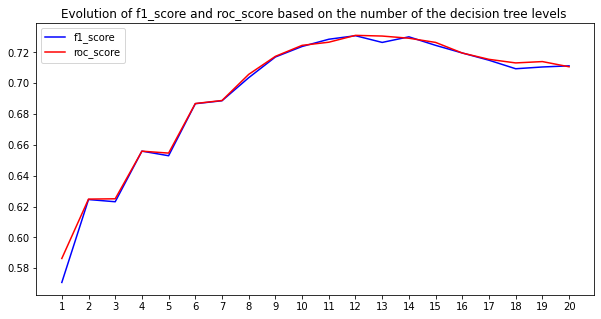

The highest value for the F1_score is equal to 0.7308 with a depth of 12 levels 


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Arbre de decision
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
def decisiontreepredictor(depth_value):
  Decree = DecisionTreeClassifier(criterion="entropy", max_depth = depth_value)
  Decree.fit(X_train,y_train)
  y_pred = Decree.predict(X_test)
  f1_value=f1_score(y_test, y_pred, average='weighted')
  roc_value=roc_auc_score(y_test, y_pred)
  return(f1_value,roc_value,y_pred)

mini=1
maxi=21
depth_list=list(range(mini,maxi))
f1_list=[]
roc_list=[]
for depth in depth_list: 
  f1_list.append(decisiontreepredictor(depth)[0])
  roc_list.append(decisiontreepredictor(depth)[1])

plt.figure(figsize=(10,5))
plt.plot( depth_list, f1_list, c='b', label='f1_score')
plt.plot( depth_list, roc_list, c='r', label='roc_score')

plt.xticks(depth_list)
plt.title('Evolution of f1_score and roc_score based on the number of the decision tree levels ')
plt.legend()
plt.show()


print('The highest value for the F1_score is equal to %.4f with a depth of %.f levels ' %(max(f1_list),f1_list.index(max(f1_list))+mini))
param_arbre=f1_list.index(max(f1_list))+mini
y_arbre=decisiontreepredictor(param_arbre)[2]

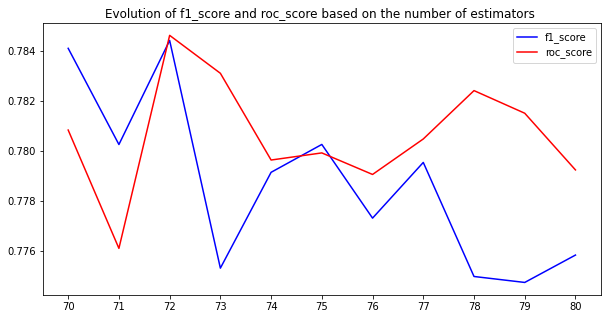

The highest value for the F1_score is equal to 0.7844 with a number of estimators: 72  


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Forêt d’arbres décisionnels (Random Forest)
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:

def randomforestpredictor(n_value):
  randomforest=RandomForestClassifier(n_estimators=n_value)
  randomforest.fit(X_train, y_train)
  y_pred=randomforest.predict(X_test)
  f1_value=f1_score(y_test, y_pred, average='weighted')
  roc_value=roc_auc_score(y_test, y_pred)
  return(f1_value,roc_value,y_pred)


mini=70
maxi=81
n_list=list(range(mini,maxi))
f1_list=[]
roc_list=[]
for n in n_list: 
  f1_list.append(randomforestpredictor(n)[0])
  roc_list.append(randomforestpredictor(n)[1])


plt.figure(figsize=(10,5))
plt.plot( n_list, f1_list, c='b', label='f1_score')
plt.plot( n_list, roc_list, c='r', label='roc_score')

plt.xticks(n_list)
plt.title('Evolution of f1_score and roc_score based on the number of estimators ')
plt.legend()
plt.show()

print('The highest value for the F1_score is equal to %.4f with a number of estimators: %.f  ' %(max(f1_list),f1_list.index(max(f1_list))+mini))
param_forest=f1_list.index(max(f1_list))+mini
y_forest=randomforestpredictor(param_forest)[2]

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Classification bayésienne naïve
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_bayes =  classifier.predict(X_test)
f1_value=f1_score(y_test, y_pred_bayes, average='weighted')
roc_value=roc_auc_score(y_test, y_pred_bayes)

y_bayes=y_pred_bayes 

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Bagging
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:

def baggingpredictor(n_value):
  bag = BaggingClassifier(base_estimator=SVC(),n_estimators=n_value, random_state=0).fit(X_train, y_train)
  y_pred=bag.predict(X_test)
  f1_value=f1_score(y_test, y_pred, average='weighted')
  roc_value=roc_auc_score(y_test, y_pred)
  return(f1_value,roc_value,y_pred)

mini=1
maxi=11
n_list=8
f1_list=[]
roc_list=[]
n=n_list
f1_list.append(baggingpredictor(n)[0])
roc_list.append(baggingpredictor(n)[1])

#plt.figure(figsize=(10,5))
#plt.plot( n_list, f1_list, c='b', label='f1_score')
#plt.plot( n_list, roc_list, c='r', label='roc_score')

#plt.xticks(n_list)
#plt.title('Evolution of f1_score and roc_score based on the number of estimators ')
#plt.legend()
#plt.show()

print('The highest value for the F1_score is equal to %.4f with a number of estimators: %.f  ' %(max(f1_list),8))
param_bag=f1_list.index(max(f1_list))+mini
y_bag=baggingpredictor(8)[2]


The highest value for the F1_score is equal to 0.7534 with a number of estimators: 8  


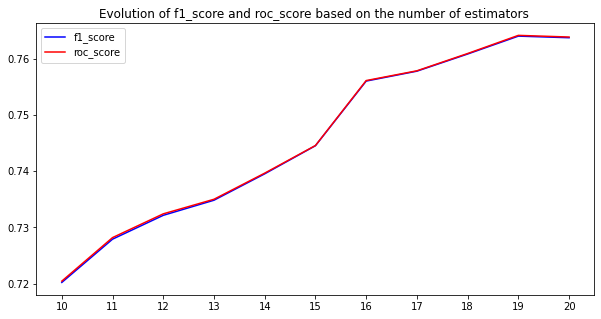

The highest value for the F1_score is equal to 0.7640 with a number of estimators: 19  


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      AdaBoost
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
def adaboostpredictor(n_value):
  classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=n_value)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  f1_value=f1_score(y_test, y_pred, average='weighted')
  roc_value=roc_auc_score(y_test, y_pred)
  return(f1_value,roc_value,y_pred)

mini=10
maxi=21
n_list=list(range(mini,maxi))
f1_list=[]
roc_list=[]
for n in n_list: 
  f1_list.append(adaboostpredictor(n)[0])
  roc_list.append(adaboostpredictor(n)[1])


plt.figure(figsize=(10,5))
plt.plot( n_list, f1_list, c='b', label='f1_score')
plt.plot( n_list, roc_list, c='r', label='roc_score')

plt.xticks(n_list)
plt.title('Evolution of f1_score and roc_score based on the number of estimators ')
plt.legend()
plt.show()

print('The highest value for the F1_score is equal to %.4f with a number of estimators: %.f  ' %(max(f1_list),f1_list.index(max(f1_list))+mini))
param_adb=f1_list.index(max(f1_list))+mini
y_adb=adaboostpredictor(param_adb)[2]

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      QUESTION 4
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# - Afficher les resultats sur les données test de chaque algorithm entrainé avec tous les features
#   1- Le taux des vrais positifs (TP Rate) – de la classe Restaurants fermés définitivement.
#   2- Le taux des faux positifs (FP Rate) – de la classe Restaurants fermés définitivement.
#   3- F-measure de la classe Restaurants fermés définitivement.
#   4- La surface sous la courbe ROC (AUC).
#   5- La matrice de confusion.
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

-----------------------------------------------
------------------Arbre de Decision------------
-----------------------------------------------
True Positive: 2493
False Positive: 880
True Negative: 2529
False Negative: 952
-----------------------------------------------
f1_score: 0.7327
AUC: 0.7328
-----------------------------------------------


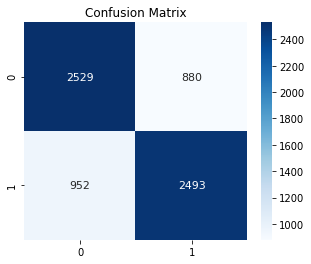

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Arbre de decision
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:

y_pred=y_arbre

CM = confusion_matrix(y_test, y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print('-----------------------------------------------')
print('------------------Arbre de Decision------------')
print('-----------------------------------------------')
print('True Positive: %.f' %TP)

print('False Positive: %.f' %FP)

print('True Negative: %.f' %TN)

print('False Negative: %.f' %FN)
print('-----------------------------------------------')

print('f1_score: %.4f' % f1_score(y_test, y_pred, average='weighted'))

print('AUC: %.4f' % roc_auc_score(y_test, y_pred))
print('-----------------------------------------------')
df_cm = pd.DataFrame(CM, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 11},cmap='Blues',fmt='g')

plt.title('Confusion Matrix')
plt.show()

------------------------------------------------------------------
-----------Forêt d’arbres décisionnels (Random Forest)------------
------------------------------------------------------------------
True Positive: 2605
False Positive: 675
True Negative: 2734
False Negative: 840
-----------------------------------------------
f1_score: 0.7789
AUC: 0.7791
-----------------------------------------------


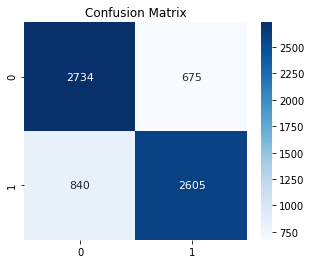

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Forêt d’arbres décisionnels (Random Forest)
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
y_pred=y_forest
CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print('------------------------------------------------------------------')
print('-----------Forêt d’arbres décisionnels (Random Forest)------------')
print('------------------------------------------------------------------')
print('True Positive: %.f' %TP)

print('False Positive: %.f' %FP)

print('True Negative: %.f' %TN)

print('False Negative: %.f' %FN)
print('-----------------------------------------------')

print('f1_score: %.4f' % f1_score(y_test, y_pred, average='weighted'))

print('AUC: %.4f' % roc_auc_score(y_test, y_pred))
print('-----------------------------------------------')
df_cm = pd.DataFrame(CM, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 11},cmap='Blues',fmt='g')

plt.title('Confusion Matrix')
plt.show()

------------------------------------------------------------------
-----------Classification bayésienne naïve------------------------
------------------------------------------------------------------
True Positive: 3249
False Positive: 2976
True Negative: 433
False Negative: 196
-----------------------------------------------
f1_score: 0.4444
AUC: 0.5351
-----------------------------------------------


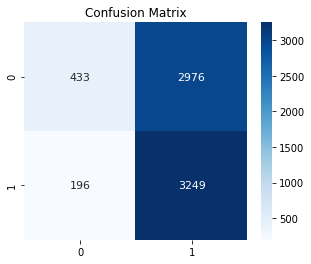

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Classification bayésienne naïve
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
y_pred=y_bayes
CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print('------------------------------------------------------------------')
print('-----------Classification bayésienne naïve------------------------')
print('------------------------------------------------------------------')
print('True Positive: %.f' %TP)

print('False Positive: %.f' %FP)

print('True Negative: %.f' %TN)

print('False Negative: %.f' %FN)
print('-----------------------------------------------')

print('f1_score: %.4f' % f1_score(y_test, y_pred, average='weighted'))

print('AUC: %.4f' % roc_auc_score(y_test, y_pred))
print('-----------------------------------------------')
df_cm = pd.DataFrame(CM, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 11},cmap='Blues',fmt='g')

plt.title('Confusion Matrix')
plt.show()

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                       Bagging
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
y_pred=y_bag
CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print('------------------------------------------------------------------')
print('----------- Bagging-----------------------------------------------')
print('------------------------------------------------------------------')
print('True Positive: %.f' %TP)

print('False Positive: %.f' %FP)

print('True Negative: %.f' %TN)

print('False Negative: %.f' %FN)
print('-----------------------------------------------')

print('f1_score: %.4f' % f1_score(y_test, y_pred, average='weighted'))

print('AUC: %.4f' % roc_auc_score(y_test, y_pred))
print('-----------------------------------------------')
df_cm = pd.DataFrame(CM, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 11},cmap='Blues',fmt='g')

plt.title('Confusion Matrix')
plt.show()

------------------------------------------------------------------
-----------adaboost-----------------------------------------------
------------------------------------------------------------------
True Positive: 2576
False Positive: 748
True Negative: 2661
False Negative: 869
-----------------------------------------------
f1_score: 0.7640
AUC: 0.7642
-----------------------------------------------


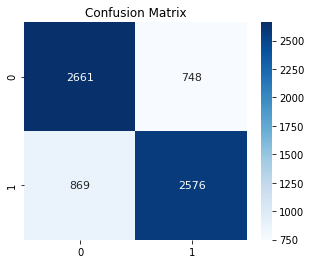

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Adaboost
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
y_pred=y_adb
CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print('------------------------------------------------------------------')
print('-----------adaboost-----------------------------------------------')
print('------------------------------------------------------------------')
print('True Positive: %.f' %TP)

print('False Positive: %.f' %FP)

print('True Negative: %.f' %TN)

print('False Negative: %.f' %FN)
print('-----------------------------------------------')

print('f1_score: %.4f' % f1_score(y_test, y_pred, average='weighted'))

print('AUC: %.4f' % roc_auc_score(y_test, y_pred))
print('-----------------------------------------------')
df_cm = pd.DataFrame(CM, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 11},cmap='Blues',fmt='g')

plt.title('Confusion Matrix')
plt.show()

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      QUESTION 5
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# - Selectionnez les tops 10 features
#
# Vous devez identifier les 10 meilleurs features en utilisant la mesure du Gain d’information (Mutual Info dans scikit-learn).
# Afficher les 10 meilleurs features dans un tableau (par ordre croissant selon le score obtenu par le Gain d'information).
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
col=x.columns
X_train_features=pd.DataFrame(X_train,columns=col)
X_test_features=pd.DataFrame(X_test,columns=col)

threshold = 10  # the number of most relevant features
high_score_features = []
feature_scores = mutual_info_classif(X_train_features, y_train, random_state=0)
for score, f_name in sorted(zip(feature_scores, col), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
X10_train = X_train_features[high_score_features]
X10_test = X_test_features[high_score_features]


moyenne_checkin 0.057294828554425026
ecart_type_checkin 0.04957031442270088
nb_restaurant_meme_annee 0.03007800518825654
nb_avis 0.02970270622376714
nb_avis_favorables 0.028585346863295502
ratio_avis_favorables 0.025629186808958426
ratio_avis_defavorables 0.025481123835418895
zone_cat 0.024691939247797112
ecart_type_etoiles 0.023558652775783395
nb_checkin 0.02067368040614781


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      QUESTION 6
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# - Entrainez 5 modèles de classification sur l'ensemble de données normalisées avec seulement les top 10 features selectionnés.
#   1 - Arbre de decision
#   2 - Forêt d’arbres décisionnels (Random Forest)
#   3 - Classification bayésienne naïve
#   4 - Bagging
#   5 - AdaBoost
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

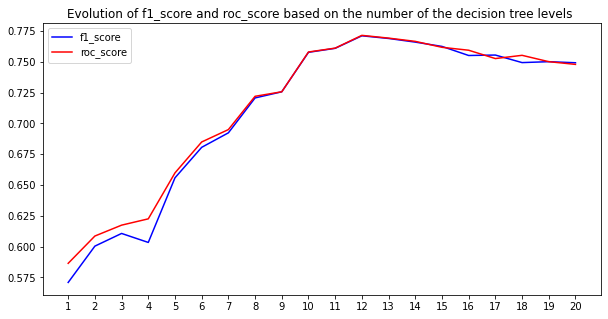

The highest value for the F1_score is equal to 0.7712 with a depth of 12 levels 


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Arbre de decision
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
def decisiontreepredictor(depth_value):
  Decree = DecisionTreeClassifier(criterion="entropy", max_depth = depth_value)
  Decree.fit(X10_train,y_train)
  y_pred = Decree.predict(X10_test)
  f1_value=f1_score(y_test, y_pred, average='weighted')
  roc_value=roc_auc_score(y_test, y_pred)
  return(f1_value,roc_value,y_pred)

mini=1
maxi=21
depth_list=list(range(mini,maxi))
f1_list=[]
roc_list=[]
for depth in depth_list: 
  f1_list.append(decisiontreepredictor(depth)[0])
  roc_list.append(decisiontreepredictor(depth)[1])

plt.figure(figsize=(10,5))
plt.plot( depth_list, f1_list, c='b', label='f1_score')
plt.plot( depth_list, roc_list, c='r', label='roc_score')

plt.xticks(depth_list)
plt.title('Evolution of f1_score and roc_score based on the number of the decision tree levels ')
plt.legend()
plt.show()

print('The highest value for the F1_score is equal to %.4f with a depth of %.f levels ' %(max(f1_list),f1_list.index(max(f1_list))+mini))
param_arbre=f1_list.index(max(f1_list))+mini
y_arbre=decisiontreepredictor(param_arbre)[2]

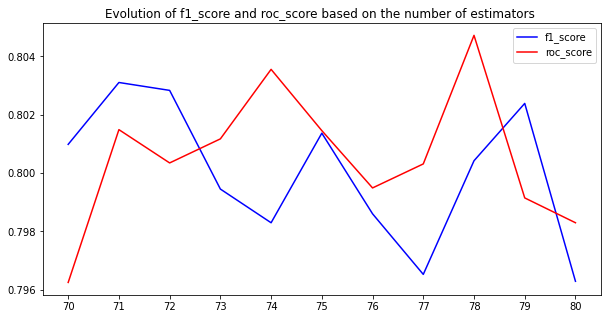

The highest value for the F1_score is equal to 0.8031 with a number of estimators: 71  


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Forêt d’arbres décisionnels (Random Forest)
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:

def randomforestpredictor(n_value):
  randomforest=RandomForestClassifier(n_estimators=n_value)
  randomforest.fit(X10_train, y_train)
  y_pred=randomforest.predict(X10_test)
  f1_value=f1_score(y_test, y_pred, average='weighted')
  roc_value=roc_auc_score(y_test, y_pred)
  return(f1_value,roc_value,y_pred)


mini=70
maxi=81
n_list=list(range(mini,maxi))
f1_list=[]
roc_list=[]
for n in n_list: 
  f1_list.append(randomforestpredictor(n)[0])
  roc_list.append(randomforestpredictor(n)[1])


plt.figure(figsize=(10,5))
plt.plot( n_list, f1_list, c='b', label='f1_score')
plt.plot( n_list, roc_list, c='r', label='roc_score')

plt.xticks(n_list)
plt.title('Evolution of f1_score and roc_score based on the number of estimators ')
plt.legend()
plt.show()

print('The highest value for the F1_score is equal to %.4f with a number of estimators: %.f  ' %(max(f1_list),f1_list.index(max(f1_list))+mini))
param_forest=f1_list.index(max(f1_list))+mini
y_forest=randomforestpredictor(param_forest)[2]

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Classification bayésienne naïve
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:

classifier = GaussianNB()
classifier.fit(X10_train, y_train)
y_pred_bayes =  classifier.predict(X10_test)
f1_value=f1_score(y_test, y_pred_bayes, average='weighted')
roc_value=roc_auc_score(y_test, y_pred_bayes)
y_bayes=y_pred_bayes 

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Bagging
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:

def baggingpredictor(n_value):
  bag = BaggingClassifier(base_estimator=SVC(),n_estimators=n_value, random_state=0).fit(X10_train, y_train)
  y_pred=bag.predict(X10_test)
  f1_value=f1_score(y_test, y_pred, average='weighted')
  roc_value=roc_auc_score(y_test, y_pred)
  return(f1_value,roc_value,y_pred)

mini=1
maxi=11
n_list=8
f1_list=[]
roc_list=[]
n=n_list
f1_list.append(baggingpredictor(n)[0])
roc_list.append(baggingpredictor(n)[1])

#plt.figure(figsize=(10,5))
#plt.plot( n_list, f1_list, c='b', label='f1_score')
#plt.plot( n_list, roc_list, c='r', label='roc_score')

#plt.xticks(n_list)
#plt.title('Evolution of f1_score and roc_score based on the number of estimators ')
#plt.legend()
#plt.show()

print('The highest value for the F1_score is equal to %.4f with a number of estimators: %.f  ' %(max(f1_list),8))
param_bag=f1_list.index(max(f1_list))+mini
y_bag=baggingpredictor(8)[2]


The highest value for the F1_score is equal to 0.7079 with a number of estimators: 8  


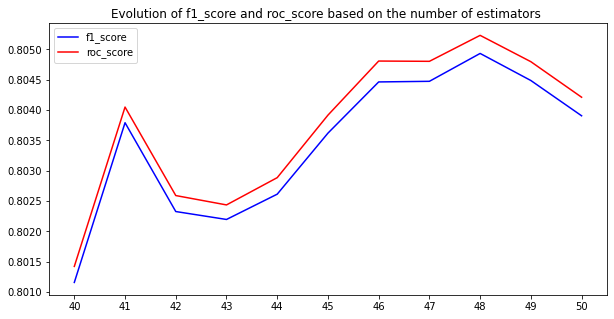

The highest value for the F1_score is equal to 0.8049 with a number of estimators: 48  


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      AdaBoost
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
def adaboostpredictor(n_value):
  classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=n_value)
  classifier.fit(X10_train, y_train)
  y_pred=classifier.predict(X10_test)
  f1_value=f1_score(y_test, y_pred, average='weighted')
  roc_value=roc_auc_score(y_test, y_pred)
  return(f1_value,roc_value,y_pred)

mini=40
maxi=51
n_list=list(range(mini,maxi))
f1_list=[]
roc_list=[]
for n in n_list: 
  f1_list.append(adaboostpredictor(n)[0])
  roc_list.append(adaboostpredictor(n)[1])


plt.figure(figsize=(10,5))
plt.plot( n_list, f1_list, c='b', label='f1_score')
plt.plot( n_list, roc_list, c='r', label='roc_score')

plt.xticks(n_list)
plt.title('Evolution of f1_score and roc_score based on the number of estimators ')
plt.legend()
plt.show()

print('The highest value for the F1_score is equal to %.4f with a number of estimators: %.f  ' %(max(f1_list),f1_list.index(max(f1_list))+mini))

param_adb=f1_list.index(max(f1_list))+mini
y_adb=adaboostpredictor(param_adb)[2]

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      QUESTION 7
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# - Afficher les resultats sur les données test de chaque algorithm entrainé avec les top 10 features
#   1- Le taux des vrais positifs (TP Rate) – de la classe Restaurants fermés définitivement.
#   2- Le taux des faux positifs (FP Rate) – de la classe Restaurants fermés définitivement.
#   3- F-measure de la classe Restaurants fermés définitivement.
#   4- La surface sous la courbe ROC (AUC).
#   5- La matrice de confusion.
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

-----------------------------------------------
------------------Arbre de Decision------------
-----------------------------------------------
True Positive: 2519
False Positive: 629
True Negative: 2780
False Negative: 926
-----------------------------------------------
f1_score: 0.7728
AUC: 0.7733
-----------------------------------------------


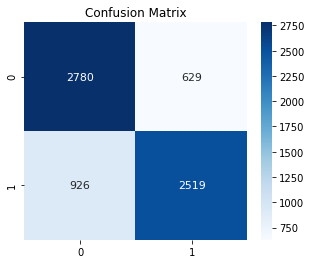

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Arbre de decision
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:

y_pred=y_arbre

CM = confusion_matrix(y_test, y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print('-----------------------------------------------')
print('------------------Arbre de Decision------------')
print('-----------------------------------------------')
print('True Positive: %.f' %TP)

print('False Positive: %.f' %FP)

print('True Negative: %.f' %TN)

print('False Negative: %.f' %FN)
print('-----------------------------------------------')

print('f1_score: %.4f' % f1_score(y_test, y_pred, average='weighted'))

print('AUC: %.4f' % roc_auc_score(y_test, y_pred))
print('-----------------------------------------------')
df_cm = pd.DataFrame(CM, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 11},cmap='Blues',fmt='g')

plt.title('Confusion Matrix')
plt.show()

------------------------------------------------------------------
-----------Forêt d’arbres décisionnels (Random Forest)------------
------------------------------------------------------------------
True Positive: 2628
False Positive: 566
True Negative: 2843
False Negative: 817
-----------------------------------------------
f1_score: 0.7980
AUC: 0.7984
-----------------------------------------------


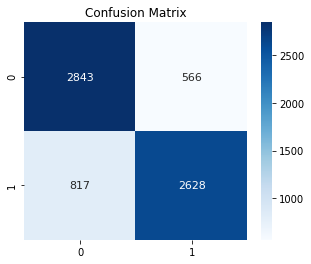

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Forêt d’arbres décisionnels (Random Forest)
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
y_pred=y_forest
CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print('------------------------------------------------------------------')
print('-----------Forêt d’arbres décisionnels (Random Forest)------------')
print('------------------------------------------------------------------')
print('True Positive: %.f' %TP)

print('False Positive: %.f' %FP)

print('True Negative: %.f' %TN)

print('False Negative: %.f' %FN)
print('-----------------------------------------------')

print('f1_score: %.4f' % f1_score(y_test, y_pred, average='weighted'))

print('AUC: %.4f' % roc_auc_score(y_test, y_pred))
print('-----------------------------------------------')
df_cm = pd.DataFrame(CM, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 11},cmap='Blues',fmt='g')

plt.title('Confusion Matrix')
plt.show()

------------------------------------------------------------------
-----------Classification bayésienne naïve------------------------
------------------------------------------------------------------
True Positive: 3290
False Positive: 3019
True Negative: 390
False Negative: 155
-----------------------------------------------
f1_score: 0.4372
AUC: 0.5347
-----------------------------------------------


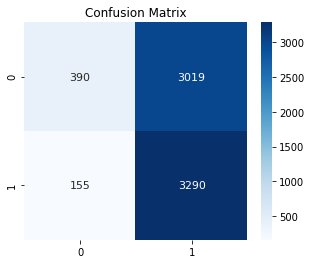

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Classification bayésienne naïve
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
y_pred=y_bayes
CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print('------------------------------------------------------------------')
print('-----------Classification bayésienne naïve------------------------')
print('------------------------------------------------------------------')
print('True Positive: %.f' %TP)

print('False Positive: %.f' %FP)

print('True Negative: %.f' %TN)

print('False Negative: %.f' %FN)
print('-----------------------------------------------')

print('f1_score: %.4f' % f1_score(y_test, y_pred, average='weighted'))

print('AUC: %.4f' % roc_auc_score(y_test, y_pred))
print('-----------------------------------------------')
df_cm = pd.DataFrame(CM, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 11},cmap='Blues',fmt='g')

plt.title('Confusion Matrix')
plt.show()

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                       Bagging
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
y_pred=y_bag
CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print('------------------------------------------------------------------')
print('----------- Bagging-----------------------------------------------')
print('------------------------------------------------------------------')
print('True Positive: %.f' %TP)

print('False Positive: %.f' %FP)

print('True Negative: %.f' %TN)

print('False Negative: %.f' %FN)
print('-----------------------------------------------')

print('f1_score: %.4f' % f1_score(y_test, y_pred, average='weighted'))

print('AUC: %.4f' % roc_auc_score(y_test, y_pred))
print('-----------------------------------------------')
df_cm = pd.DataFrame(CM, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 11},cmap='Blues',fmt='g')

plt.title('Confusion Matrix')
plt.show()

------------------------------------------------------------------
-----------adaboost-----------------------------------------------
------------------------------------------------------------------
True Positive: 2674
False Positive: 565
True Negative: 2844
False Negative: 771
-----------------------------------------------
f1_score: 0.8049
AUC: 0.8052
-----------------------------------------------


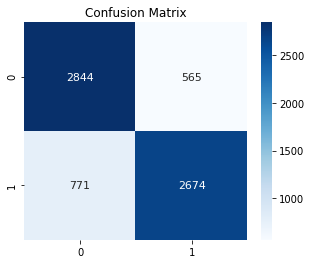

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#                      Adaboost
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Votre code ici:
y_pred=y_adb
CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print('------------------------------------------------------------------')
print('-----------adaboost-----------------------------------------------')
print('------------------------------------------------------------------')
print('True Positive: %.f' %TP)

print('False Positive: %.f' %FP)

print('True Negative: %.f' %TN)

print('False Negative: %.f' %FN)
print('-----------------------------------------------')

print('f1_score: %.4f' % f1_score(y_test, y_pred, average='weighted'))

print('AUC: %.4f' % roc_auc_score(y_test, y_pred))
print('-----------------------------------------------')
df_cm = pd.DataFrame(CM, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 11},cmap='Blues',fmt='g')

plt.title('Confusion Matrix')
plt.show()